## 泛癌分析 

In [1]:
data_path <- '/home/shiyu/Desktop/projects/graduation/data/'
fig_path <- '/home/shiyu/Desktop/projects/graduation/fig/'

In [2]:
suppressMessages(library(showtext))
## Loading Google fonts (https://fonts.google.com/)
font_add_google("Gochi Hand", "gochi")
font_add_google("Schoolbell", "bell")
font_add_google("Covered By Your Grace", "grace")
font_add_google("Rock Salt", "rock")
showtext_auto()

### 基因表达差异分析

In [3]:
d <- as.data.frame(readxl::read_excel(paste0(data_path, 'data.xlsx'), 
                                      sheet='基因表达差异分析'))
d$type <- unlist(strsplit(d[,1], '(', fixed = TRUE))[seq(1, 2*nrow(d), by=2)]
dim(d)
head(d,2)

[1] 22046     5

Type              Group Expression SampleName      type
1 GBM(T=153,N=1157) Tumor 5.5336     TCGA-19-1787-01 GBM 
2 GBM(T=153,N=1157) Tumor 5.2122     TCGA-06-5412-01 GBM

#### 未配对的双样本 Wilcoxon 检验

这里是对每一种癌种下，normal和tumor的表达差异进行检验

http://www.sthda.com/english/wiki/unpaired-two-samples-wilcoxon-test-in-r

In [4]:
s <- split(d, d$type)
r <- unlist(lapply(s, function(x) wilcox.test(Expression ~ Group, data = x, 
                        exact = FALSE)[3][[1]]))
round(r,5)                   
u <- numeric(length(s))
u[r < 0.0001] <- '****'
u[r >= 0.0001 & r < 0.001] <- '***'
u[r >= 0.001 & r < 0.01] <- '**'
u[r >= 0.01 & r < 0.05] <- '*'
u[u == 0] <- '.'

ACC      ALL     BLCA     BRCA     CESC     CHOL     COAD COADREAD 
 0.00000  0.00000  0.01971  0.19298  0.00023  0.00001  0.01799  0.01706 
    ESCA      GBM   GBMLGG     HNSC     KICH    KIPAN     KIRC     KIRP 
 0.30169  0.00003  0.00000  0.00000  0.00000  0.00000  0.00000  0.00000 
    LAML      LGG     LIHC     LUAD     LUSC       OV     PAAD     PCPG 
 0.00000  0.00000  0.00000  0.00000  0.00000  0.00000  0.00000  0.42110 
    PRAD     READ     SKCM     STAD     STES     TGCT     THCA     UCEC 
 0.00000  0.01954  0.00000  0.00000  0.00079  0.00000  0.00021  0.98045 
     UCS       WT 
 0.09569  0.00000

#### 小提琴图

In [30]:
t <- d[d$Group == 'Tumor',]
n <- d[d$Group == 'Normal',]
t <- t[order(t$type),]
n <- n[order(n$type),]

pdf(paste0(fig_path, '基因差异表达分析.PDF'), family = "GB1",
    width = 20, height = 8)
vioplot::vioplot(t$Expression ~ t$type, side = "left", 
                 plotCentre = "line", col=2, axes=FALSE,
                 xlab='', ylab='', xaxt='n', yaxt='n',
                 ylim=c(-12.8,9), xlim=c(0,36))

vioplot::vioplot(n$Expression ~ n$type, side = "right", axes=FALSE,
                 plotCentre = "line", col=3, add = TRUE)
title(main='基因差异表达分析',cex.main=1.6)
abline(h=-10, col=grey(0.2,0.9))
abline(v=0, col=grey(0.2,0.9))

mtext(seq(-8,8,by=4), side=2, at=seq(-8,8,by=4), las=1, line=-2.8)
mtext('癌症类型', side=1, line=0, cex=1.2)
mtext('基因表达量', side=2, line=-1.5, at=0, cex=1.2)
text(1:34, -10.5, unique(t$type), srt=55, family = "sans", adj=1)
text(1:34, 9.5, u)
legend(35, 1, legend = c("Normal", "Tumor"), 
       fill = c(2, 3), cex = 1.2, x.intersp=0.5, y.intersp=1)

dev.off()

[1] "Using c(0,36) as input for xlim, note that default values for these dimensions are c(0.5,34.5)"


png 
  2

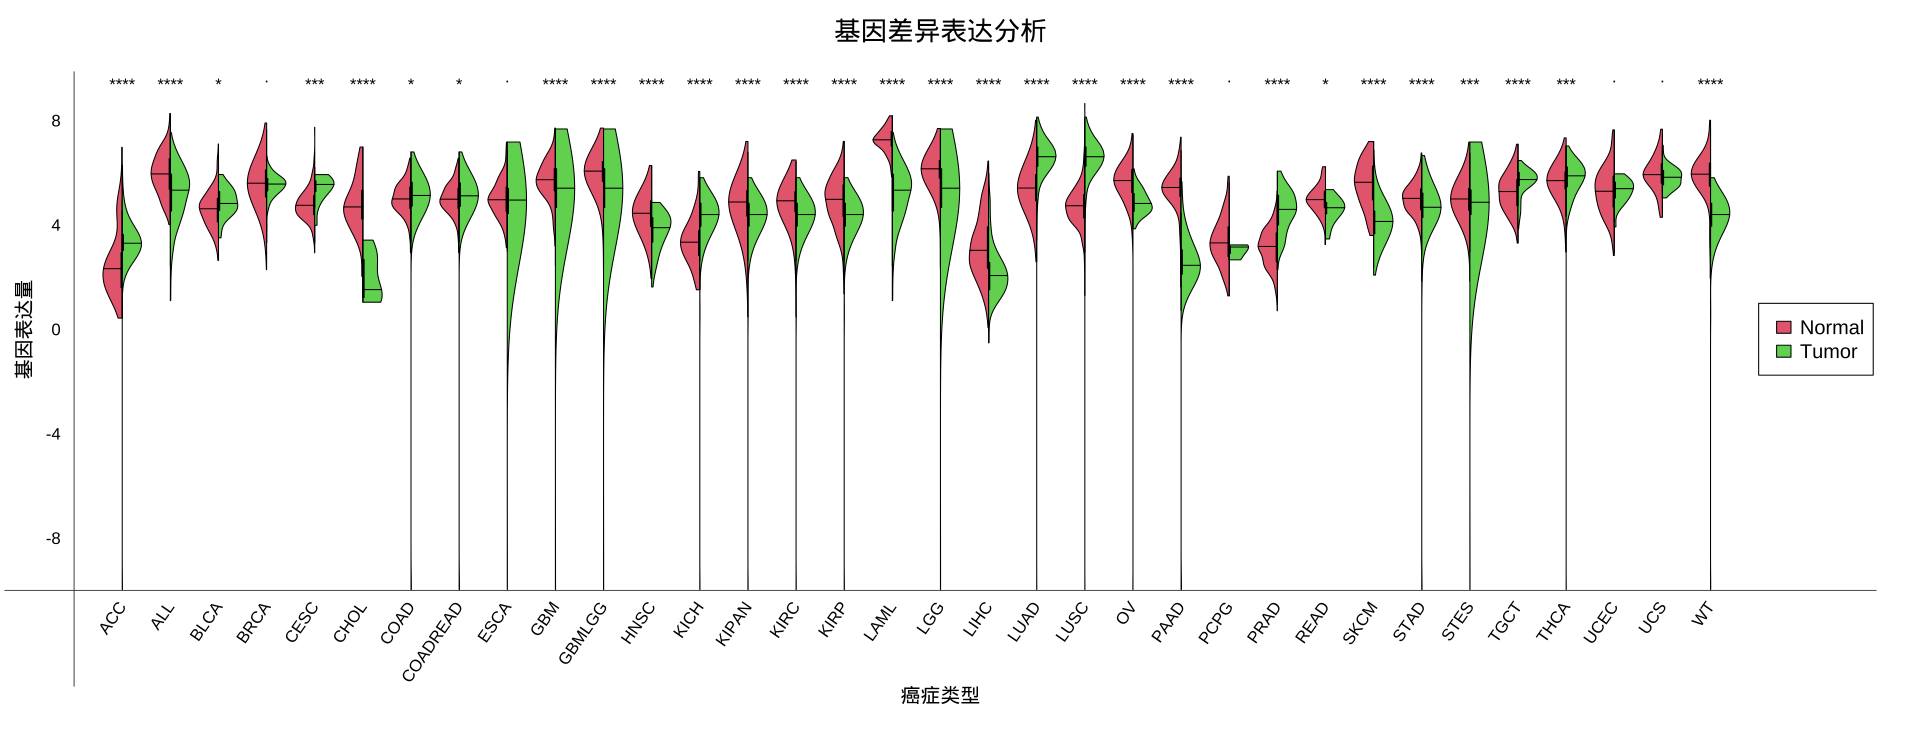

### 临床分期与基因表达分析

In [72]:
d <- as.data.frame(readxl::read_excel(paste0(data_path, 'data.xlsx'), 
                                      sheet='临床分期与基因表达分析'))
d$type <- unlist(strsplit(d[,1], '(', fixed = TRUE))[seq(1, 2*nrow(d), by=2)]
d$group <- paste(d$type, d$T, sep='_')
d$group <- as.factor(d$group)
dim(d)
head(d,2)

[1] 8976    6

Type                           T  Expression SampleName      type group  
1 CESC(T1=140,T2=71,T3=20,T4=10) T2 4.3569     TCGA-EK-A2RE-01 CESC CESC_T2
2 CESC(T1=140,T2=71,T3=20,T4=10) T1 4.1474     TCGA-IR-A3L7-01 CESC CESC_T1

#### Kruskal-Wallis 检验

http://www.sthda.com/english/wiki/kruskal-wallis-test-in-r

KW检验可用于比较多组之间的差异，这里用于比较每一种癌种下，不同的临床分期是否有显著性差异

In [73]:
s <- split(d, d$type)
r <- unlist(lapply(s, function(x) kruskal.test(Expression ~ T, data=x)[3][[1]]))
round(r,3)
                   
u <- numeric(length(s))
u[r < 0.0001] <- '****'
u[r >= 0.0001 & r < 0.001] <- '***'
u[r >= 0.001 & r < 0.01] <- '**'
u[r >= 0.01 & r < 0.05] <- '*'
u[u == 0] <- '.'

ACC     BLCA     BRCA     CESC     CHOL     COAD COADREAD     ESCA 
   0.477    0.047    0.807    0.169    0.018    0.155    0.072    0.689 
    HNSC     KICH    KIPAN     KIRC     KIRP     LIHC     LUAD     LUSC 
   0.689    0.977    0.000    0.157    0.025    0.131    0.010    0.058 
    MESO     PAAD     PRAD     READ     SKCM     STAD     STES     TGCT 
   0.727    0.029    0.002    0.609    0.557    0.565    0.751    0.096 
    THCA      UVM 
   0.291    0.493

#### 箱线图

In [40]:
pdf(paste0(fig_path, '临床分期与基因表达分析.PDF'), 
   width = 20, height = 8)
cols <- c('#fbb4ae', '#b3cde3', '#ccebc5', '#decbe4')
r <- rep(1:4, 26)[-c(20,40,52,73,81,96,101)]
o <- rep(c(2, rep(1,3)), 26)[-c(5,10,13,19,21,24,26)*4]
o[1] <- 1
at <- cumsum(o)
d <- d[order(d$group),]
boxplot(d$Expression ~ d$group, pch=20, cex=0.5, col=cols[r], ylim=c(-1.8,9),
        axes=FALSE, xlab='', ylab='', at=at, xlim=c(1,124))
abline(v=-1, col=grey(0.2,0.9))
abline(h=-0.2, col=grey(0.2,0.9))

text(cumsum(c(rep(5,7),4,5,5,4,rep(5,8),4,4,4,5,5,4,4))-2.5, -0.4, 
     unique(d$type), srt=55, family = "sans", adj=1)
# 加上KW检验结果的P值
text(cumsum(c(rep(5,7),4,5,5,4,rep(5,8),4,4,4,5,5,4,4))-4, 9, u, cex=1.5)
text(-2.2, seq(0,8, by=2), seq(0,8, by=2))
mtext('癌症类型', side=1, line=-1.8, cex=1.2)
mtext('基因表达量', side=2, line=0, at=5, cex=1.2)
title(main='临床分期与基因表达分析',cex.main=1.6)

legend(124, 5.6, sort(unique(d$T)),
       box.col=grey(0.2,0.8), box.lwd=0.6, pch=15, cex=1,
       lty=0, lwd=3, col=cols, x.intersp=0.1, y.intersp=0.8)
dev.off()

png 
  2

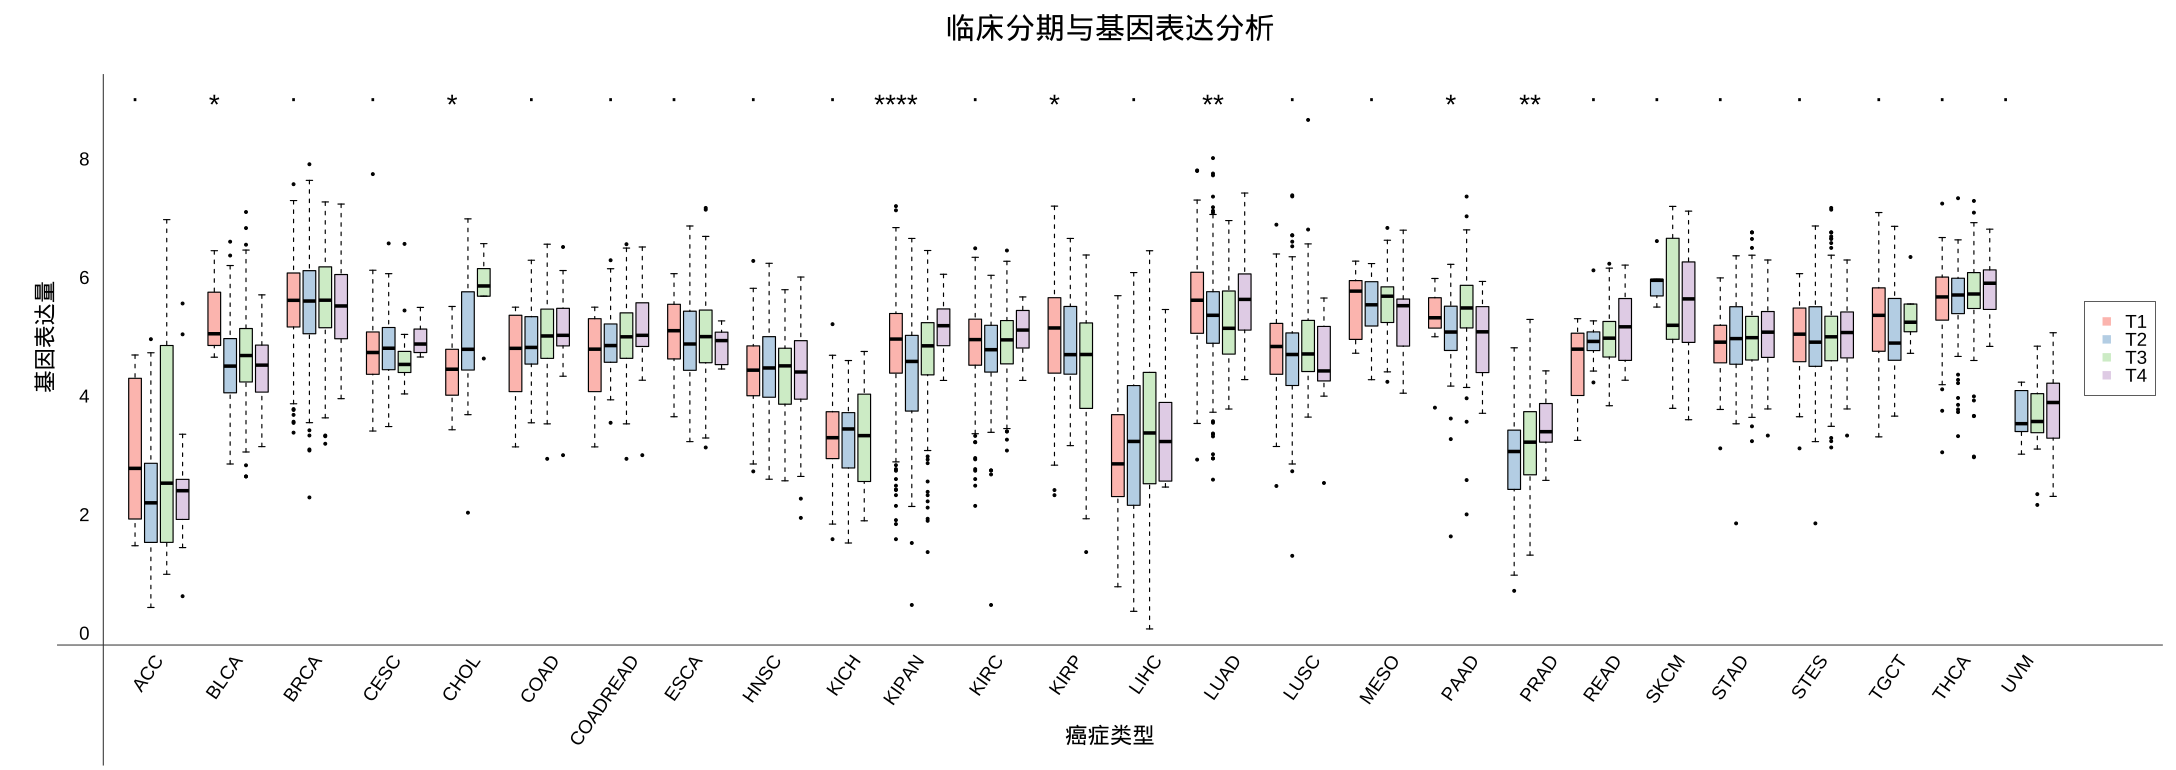

对于临床分期存在显著差异的癌种，对这些癌种进行组间多重成对比较，找出具体存在差异的临床分析分期

In [74]:
# 找出P值 < 0.05的癌种
ss <- s[which(r < 0.05)]
# wilcox配对检验
l <- suppressWarnings(lapply(ss, function(x) 
    pairwise.wilcox.test(x$Expression, x$T, p.adjust.method = "BH")[3]))

In [204]:
pdf(paste0(fig_path, 'KW检验的显著性P值.PDF'), 
    width = 8, height = 13)
layout(rbind(c(8,8,8,8),
             c(1,1,2,2),
             c(3,3,4,4),
             c(5,6,6,7)),
      height=c(1.1, 3, 3, 2.2),
      width=c(2, 1, 1, 2))

q <- c(1,3,5,6)
for (i in q){
df <- l[[i]][[1]]
s <- seq(-1,1,l=nrow(df)+1)
xl <- c(rep(s[1],3), rep(s[2],2), s[3])
xr <- c(rep(s[2],3), rep(s[3],2), s[4])
yb <- c(s[3:1], s[2:1], s[1])
yt <- c(s[4:2], s[3:2], s[2])
n <- as.numeric(df)[-which(is.na(as.numeric(df)))]
u <- numeric(length(n))
u[n < 0.0001] <- '****'
u[n >= 0.0001 & n < 0.001] <- '***'
u[n >= 0.001 & n < 0.01] <- '**'
u[n >= 0.01 & n < 0.05] <- '*'
u[u == 0] <- '.'
plot.new()
plot.window(xlim = c(-1,1), ylim = c(-1,1))
rect(xl,yb,xr,yt, col=rgb(1,0,0,(1-n)*0.8), border='white')
text((xl+xr)/2, yb+0.28, round(n,3), cex=1.5)
text((xl+xr)/2, yb+0.4, u, cex=2)
mtext(colnames(df), side=1, at=sort(unique((xl+xr)/2)), cex=1)
mtext(rownames(df), side=2, line=-.5, at=rev(sort(unique((yb+yt)/2))), 
      cex=1, las=1)
mtext(names(l)[i], side=3, cex=1.2)
}

p <- c(2,4,7)
for (i in p){
df <- l[[i]][[1]]
s <- seq(-1,1,l=nrow(df)+1)
xl <- c(rep(s[1],2), s[2])
xr <- c(rep(s[2],2), s[3])
yb <- c(s[2:1], s[1])
yt <- c(s[3:2], s[2])
n <- as.numeric(df)[-which(is.na(as.numeric(df)))]
u <- numeric(length(n))
u[n < 0.0001] <- '****'
u[n >= 0.0001 & n < 0.001] <- '***'
u[n >= 0.001 & n < 0.01] <- '**'
u[n >= 0.01 & n < 0.05] <- '*'
u[u == 0] <- '.'
plot.new()
plot.window(xlim = c(-1,1), ylim = c(-1,1))
rect(xl,yb,xr,yt, col=rgb(1,0,0,(1-n)*0.8), border='white')
text((xl+xr)/2, yb+0.42, round(n,3), cex=1.3)
text((xl+xr)/2, yb+0.58, u, cex=1.6)
mtext(colnames(df), side=1, at=sort(unique((xl+xr)/2)), cex=.8)
mtext(rownames(df), side=2, line=0, at=rev(sort(unique((yb+yt)/2))), 
      cex=.8, las=1)
mtext(names(l)[i], side=3, cex=1)
}

plot.new()
text(.5, .5,'KW检验的显著性P值', cex=2)
dev.off()

png 
  2

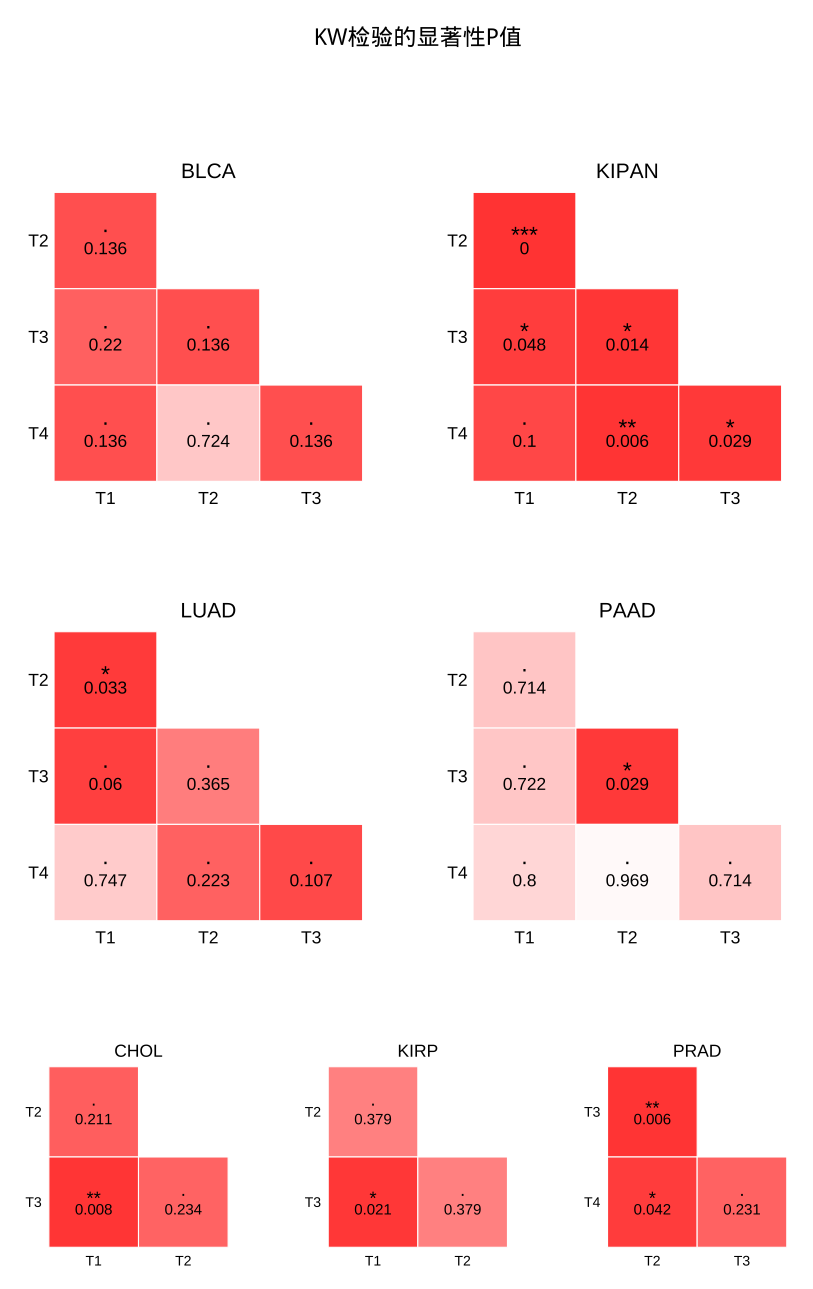

In [60]:
pdf(paste0(fig_path, 'KW3*3.PDF'), 
   width = 8, height = 8)
q <- c(1,3,5,6)
for (i in q){
df <- l[[i]][[1]]
s <- seq(-1,1,l=nrow(df)+1)
xl <- c(rep(s[1],3), rep(s[2],2), s[3])
xr <- c(rep(s[2],3), rep(s[3],2), s[4])
yb <- c(s[3:1], s[2:1], s[1])
yt <- c(s[4:2], s[3:2], s[2])
n <- as.numeric(df)[-which(is.na(as.numeric(df)))]

u <- numeric(length(n))
u[n < 0.0001] <- '****'
u[n >= 0.0001 & n < 0.001] <- '***'
u[n >= 0.001 & n < 0.01] <- '**'
u[n >= 0.01 & n < 0.05] <- '*'
u[u == 0] <- '.'

plot.new()
plot.window(xlim = c(-1,1), ylim = c(-1,1))
rect(xl,yb,xr,yt, col=rgb(1,0,0,(1-n)*0.8), border='white')
text((xl+xr)/2, yb+0.3, round(n,3), cex=2)
text((xl+xr)/2, yb+0.4, u, cex=2)
mtext(colnames(df), side=1, at=sort(unique((xl+xr)/2)), cex=2)
mtext(rownames(df), side=2, line=-.5, at=rev(sort(unique((yb+yt)/2))), 
      cex=2, las=1)
mtext(paste0('KW检验的显著性P值 (',names(l)[i], ')'), side=3, cex=2)
}
dev.off()

png 
  2

In [70]:
pdf(paste0(fig_path, 'KW2*2.PDF'), 
   width = 8, height = 8)
p <- c(2,4,7)
for (i in p){
df <- l[[i]][[1]]
s <- seq(-1,1,l=nrow(df)+1)
xl <- c(rep(s[1],2), s[2])
xr <- c(rep(s[2],2), s[3])
yb <- c(s[2:1], s[1])
yt <- c(s[3:2], s[2])
n <- as.numeric(df)[-which(is.na(as.numeric(df)))]

u <- numeric(length(n))
u[n < 0.0001] <- '****'
u[n >= 0.0001 & n < 0.001] <- '***'
u[n >= 0.001 & n < 0.01] <- '**'
u[n >= 0.01 & n < 0.05] <- '*'
u[u == 0] <- '.'

plot.new()
plot.window(xlim = c(-1,1), ylim = c(-1,1))
rect(xl,yb,xr,yt, col=rgb(1,0,0,(1-n)*0.8), border='white')
text((xl+xr)/2, yb+0.45, round(n,3), cex=2)
text((xl+xr)/2, yb+0.55, u, cex=2)
mtext(colnames(df), side=1, at=sort(unique((xl+xr)/2)), cex=2)
mtext(rownames(df), side=2, line=-.5, at=rev(sort(unique((yb+yt)/2))), 
      cex=2, las=1)
mtext(paste0('KW检验的显著性P值 (',names(l)[i], ')'), side=3, cex=2)
}
dev.off()

png 
  2

### 基因表达预后分析

* 预后概念： https://www.bmj.com/content/338/bmj.b375
* Cox比例风险模型： https://shariq-mohammed.github.io/files/cbsa2019/1-intro-to-survival.html
* 森林图： https://www.datacamp.com/tutorial/survival-analysis-R

In [3]:
d <- as.data.frame(readxl::read_excel(paste0(data_path, 'data.xlsx'), 
                                      sheet='基因表达预后分析'))
d$type <- substring(d[,1], 6, last = 1000000L)
dim(d)
head(d,2)

[1] 12107     6

Code        SampleName      Value  Time Status type  
1 TCGA-GBM    TCGA-19-1787-01 5.5336 385  1      GBM   
2 TCGA-GBMLGG TCGA-19-1787-01 5.5336 385  1      GBMLGG

#### 对癌种类型进行Cox比例风险模型

In [18]:
library(survival)
suppressMessages(library(survminer))
library(ggforestplot)

fit <- coxph(Surv(Time, Status)~type, data=d)
# 森林图
pdf(paste0(fig_path, '森林图.PDF'), width = 10, height = 14)
ggforest(fit, data = d, main='森林图', fontsize = 0.85, 
         cpositions = c(0.06, 0.15, 0.36))
dev.off()

png 
  2

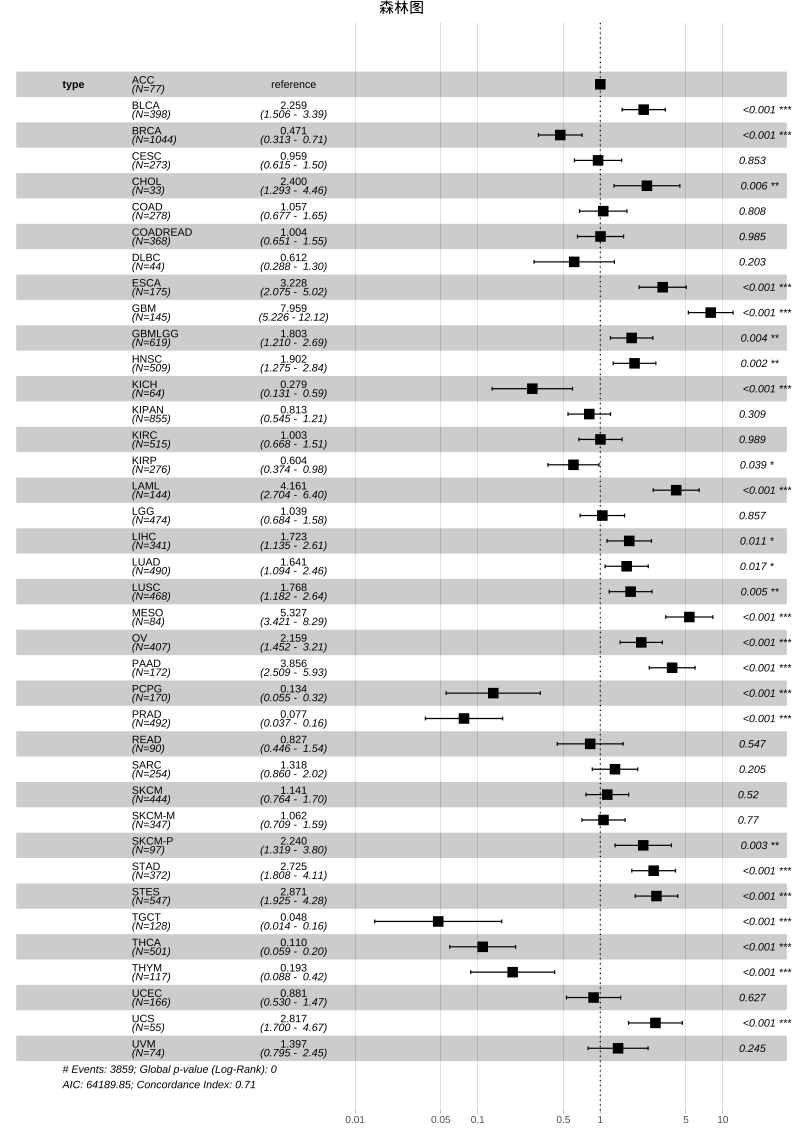

In [98]:
# 生存曲线
pdf(paste0(fig_path, '生存曲线.PDF'), width = 10, height = 12)
s <- survfit(Surv(Time, Status)~type, data=d)
ggsurvplot(s, legend.labs=sort(unique(d$type)), 
           palette='hue', size=0.8, 
           legend.title='Cancer Types') +
           xlab("时间") + ylab("生存概率")
dev.off()

png 
  2

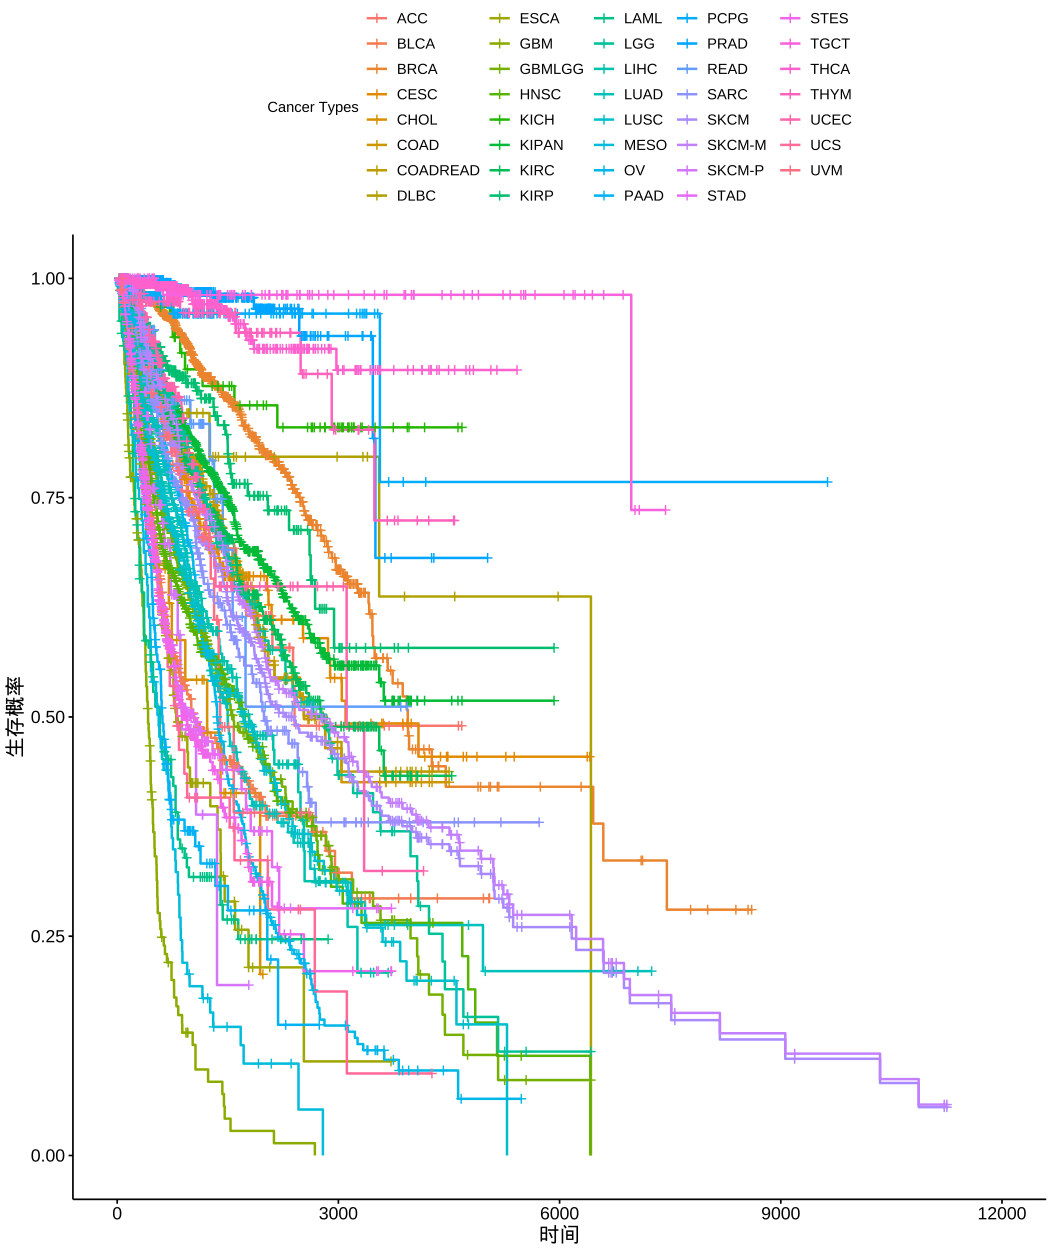

### 肿瘤干性与基因表达分析

In [3]:
d <- as.data.frame(readxl::read_excel(paste0(data_path, 'data.xlsx'), 
                                      sheet='肿瘤干性与基因表达分析'))
d$type <- unlist(strsplit(d[,1], '(', fixed = TRUE))[seq(1, 2*nrow(d), by=2)]
dim(d)
head(d,2)

[1] 10057     5

Type      DNAss     Expression SampleName      type
1 GBM(N=51) 0.1420615 5.2122     TCGA-06-5412-01 GBM 
2 GBM(N=51) 0.1815386 5.4403     TCGA-12-5299-01 GBM

In [4]:
s <- split(d, d$type)
cor <- unlist(lapply(s, function(x) 
     cor(x$DNAss, x$Expression, method='pearson')))
p <- unlist(lapply(s, function(x)
    cor.test(x$DNAss, x$Expression, method='pearson')[[3]]))
df <- as.data.frame(cbind(cor,p))
df <- df[order(df$cor, decreasing=TRUE),]
                   
u <- numeric(length(df[,2]))
u[df[,2] < 0.0001] <- 5
u[df[,2] >= 0.0001 & df[,2] < 0.001] <- 4
u[df[,2] >= 0.001 & df[,2] < 0.01] <- 3
u[df[,2] >= 0.01 & df[,2] < 0.05] <- 2
u[u == 0] <- 1

In [7]:
pdf(paste0(fig_path, '肿瘤干性与基因表达分析.PDF'), 
    width = 10, height = 10)
plot.new()
plot.window(xlim = c(-0.7,0.3), ylim = c(-1,37))
for (i in 1:dim(df)[1]) 
     lines(c(0,df[i,1]), rep(i,2), 
     col=2, lwd=3)

points(df[,1],1:37, cex=u/2.6+0.6, pch=19, col=2)

lines(rep(0,2), c(1,37), lty=2, col='#C9000060')
abline(h=-0.5)
abline(v=-0.7)
mtext(rownames(df), side=2, line=-1.2, at=1:37, las=1)
mtext(round(seq(-0.6,0.3,by=0.2),1), side=1, line=-1.7, 
      at=round(seq(-0.6,0.3,by=0.2),1))
mtext('皮尔逊相关系数', side=1, line=-0.2, cex=1.2)
mtext('癌症类型', side=2, line=3, cex=1.2)
mtext('肿瘤干性与基因表达分析', side=3, line=1, cex=1.3)

legend(0.25, 37, 
       c('****','***','**','*','.'), 
       pch=19, col=2,
       pt.cex=5:1/2.6+0.6, , x.intersp=1.5,
       y.intersp=1.1, box.col=grey(0.3,0.3), box.lwd=0.6,
       title='p值')
dev.off()

png 
  2

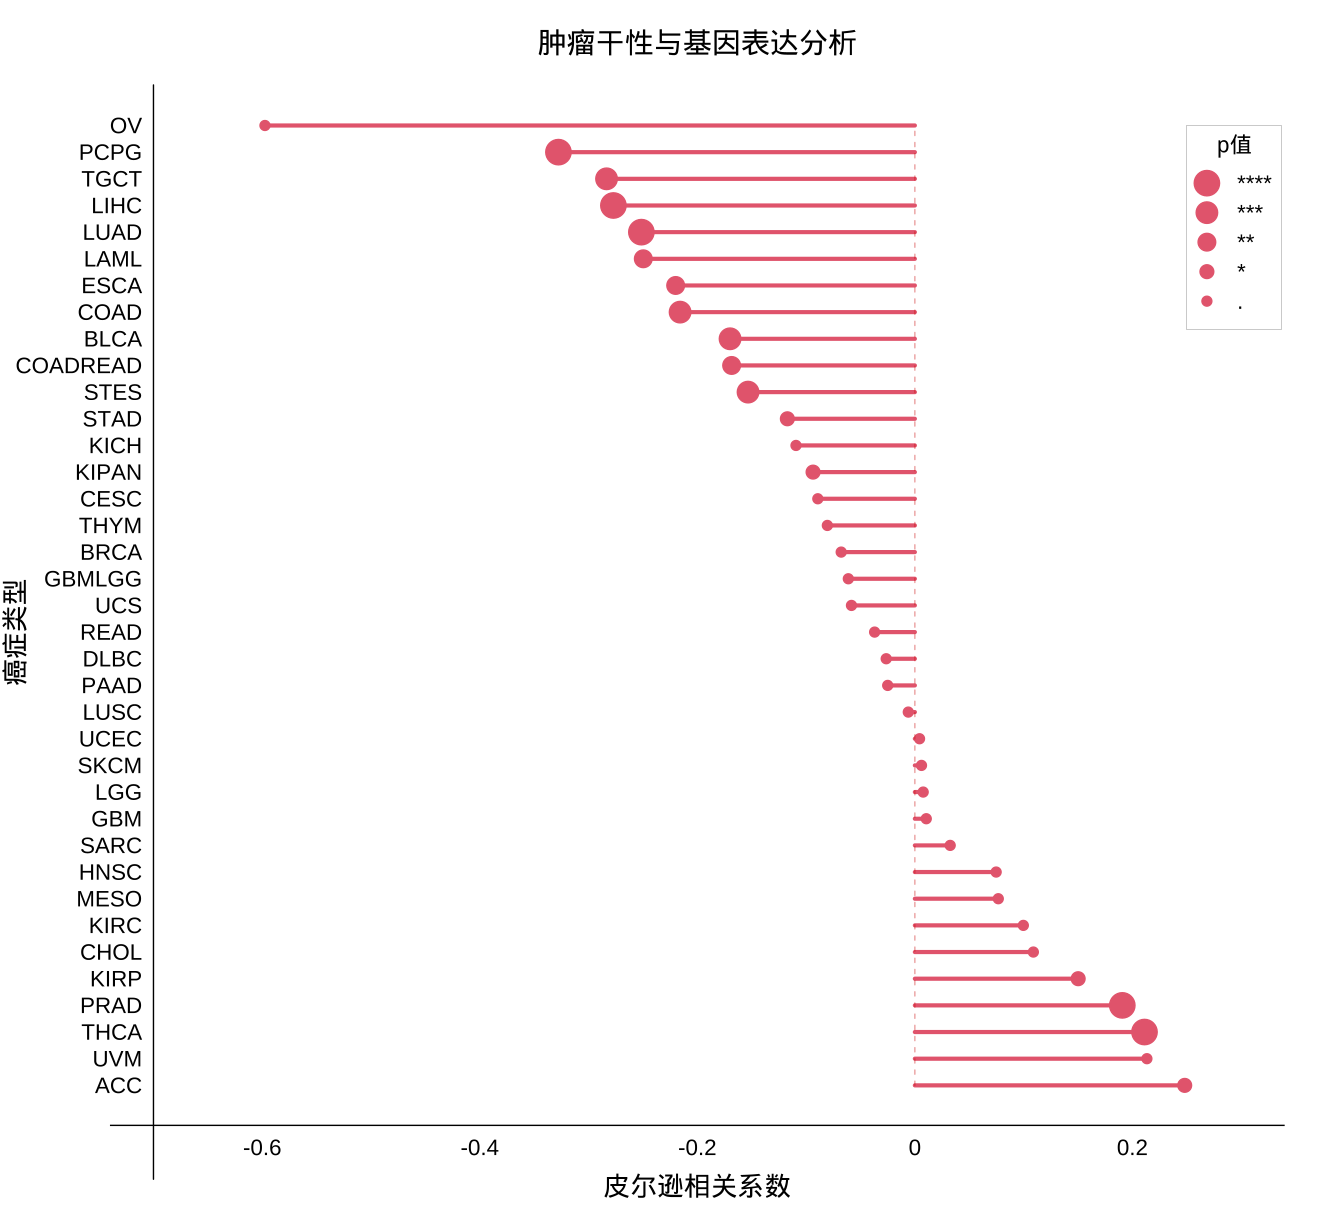

### TMB（肿瘤突变负荷）与基因表达关系分析

In [6]:
d <- as.data.frame(readxl::read_excel(paste0(data_path, 'data.xlsx'), 
                                      sheet='TMB与基因表达关系分析'))
d$type <- unlist(strsplit(d[,1], '(', fixed = TRUE))[seq(1, 2*nrow(d), by=2)]
dim(d)
head(d,2)

[1] 11002     5

Type       TMB   Expression SampleName      type
1 GBM(N=149) 10.74 5.5336     TCGA-19-1787-01 GBM 
2 GBM(N=149)  0.96 5.2122     TCGA-06-5412-01 GBM

In [8]:
s <- split(d, d$type)
cor <- unlist(lapply(s, function(x) 
     cor(x$TMB, x$Expression, method='pearson')))
p <- unlist(lapply(s, function(x)
    cor.test(x$TMB, x$Expression, method='pearson')[[3]]))
df <- as.data.frame(cbind(cor,p))
df <- df[order(df$cor, decreasing=TRUE),]

In [211]:
pdf(paste0(fig_path, '肿瘤突变负荷与基因表达关系分析.PDF'), 
    width = 10, height = 10)
plot.new()
plot.window(xlim = c(-0.56,0.32), ylim = c(-1,37))
for (i in 1:dim(df)[1]) 
     lines(c(0,df[i,1]), rep(i,2), 
     col=rgb(1,0,0,1-df[i,2]), lwd=14)
abline(h=-0.5)
abline(v=-0.56)
mtext(rownames(df), side=2, line=-1.2, at=1:37, las=1)
mtext(round(seq(-0.5,0.3,by=0.2),1), side=1, line=-1.8, 
      at=round(seq(-0.5,0.3,by=0.2),1))

mtext('皮尔逊相关系数', side=1, line=-0.2, cex=1.2)
mtext('癌症类型', side=2, line=3, cex=1.2)
mtext('肿瘤突变负荷与基因表达关系分析', side=3, line=1, cex=1.3)

xl <- 0.26
xr <- 0.30
yb <- seq(26,36,l=11)
yt <- seq(26,36,l=11)+1
rect(xl,yb,xr,yt, lwd=0, col=rgb(1,0,0,seq(0.06,1,l=11)), border = NA)
text(0.30,38,'p值')
lines(rep(0.306,2), c(26,36.89), col=grey(0.1,0.9))
for (i in 1:6) 
    lines(c(0.306,0.313),rep(seq(26,36.89,l=6)[i],2),col=grey(0.1,0.9))
text(0.332, seq(26,36.89,l=6), format(seq(1,0,l=6),2), 
     cex=0.8, col=grey(0.1,0.9))
dev.off()

png 
  2

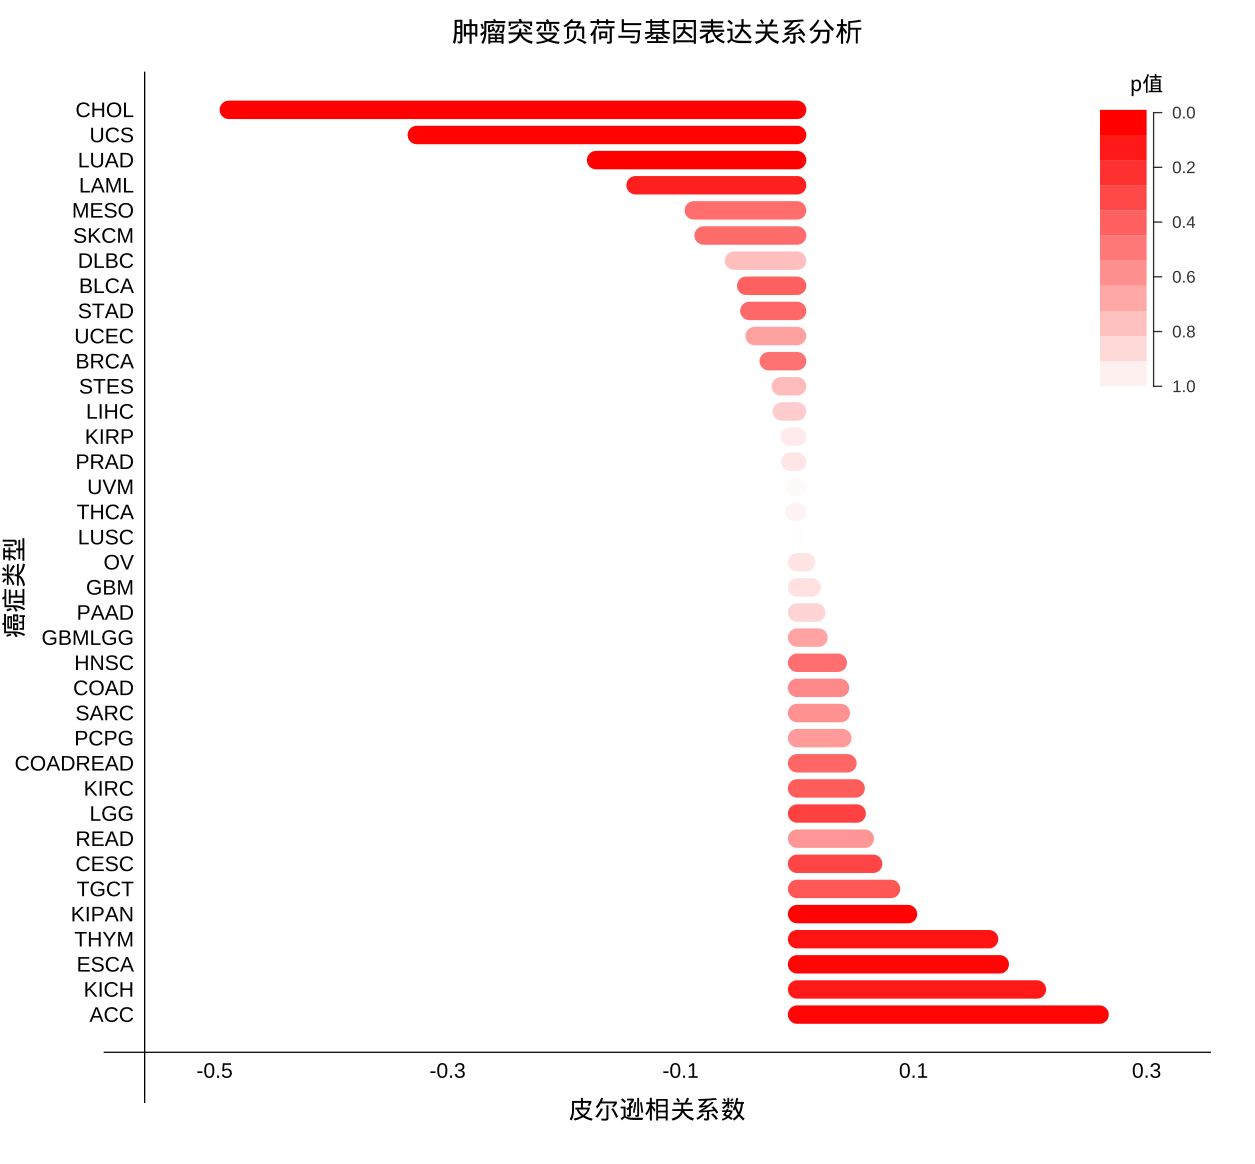

### 免疫浸润分析

#### Timer

In [245]:
d <- as.data.frame(readxl::read_excel(paste0(data_path, 'df.xlsx'), 
                                      sheet='Timer_o'))
d$type <- substring(unlist(strsplit(d[,1], 
        '(', fixed = TRUE))[seq(1, 2*nrow(d), by=2)], 6, last = 1000000L)
d$score <- rowSums(d[,3:8])
dim(d)
head(d,2)

[1] 10887    11

CODE           ID              B_cell    T_cell_CD4 T_cell_CD8 Neutrophil
1 TCGA-ACC(N=77) TCGA-OR-A5K3-01 0.1064578 0.0974803  0.2056603  0.1092535 
2 TCGA-ACC(N=77) TCGA-OR-A5J2-01 0.1168300 0.1033708  0.2184238  0.1111659 
  Macrophage DC        exp    type score   
1 0.05502625 0.4772098 1.2147 ACC  1.051088
2 0.06337196 0.4920066 4.9241 ACC  1.105169

In [246]:
func <- function(d,f,l){
    # input d is data, 
    # f is the first column of immune cells, l is the last column of immune cells
    s <- split(d, d$type)
    u <- unlist(lapply(s, function(x) colMeans(x[f:l])))
    dim(u) <- c(length(s),l-f+1)
    dimnames(u) <- list(names(s), colnames(d)[f:l])
    u <- u[order(rowSums(u)),]
    u
}

In [247]:
f <- function(d, e, s){
    # input d is data, e is the index of column exp, 
    # s is the index of column score
    s <- split(d[,c(e,s)], d$type)
    r <- unlist(lapply(s, function(x) 
         cor.test(x$exp, x$score, method='pearson')[[4]]))
    p <- unlist(lapply(s, function(x) 
         cor.test(x$exp, x$score, method='pearson')[[3]]))
    as.data.frame(cbind(p,r))
}

In [248]:
u <- func(d, 3, 8)
Timer <- f(d,9,11)
cols <- c('#a6cee3','#1f78b4','#b2df8a','#33a02c','#fb9a99','#e31a1c')

pdf(paste0(fig_path, 'Timer免疫浸润分析结果.PDF'), 
    width = 10, height = 8)
barplot(t(u), horiz=TRUE, col=cols, las=1, border=NA, yaxt='n',
        axes=FALSE, ylim=c(0,40), xlim=c(-0.3,3))
lines(c(0,3.1), rep(-0.6,2))
mtext(seq(0,3,by=.5), side=1, line=-0.5, at=seq(0,3,by=.5))
mtext(rownames(u), side=2, line=-3.6, at=1:36*1.2-0.5, las=1)
mtext('免疫细胞组成', side=1, line=0.8, cex=1.2)
mtext('癌症类型', side=2, line=1, cex=1.2)
mtext('Timer免疫浸润分析结果', side=3, line=2, cex=1.4)
legend(2.49,12, colnames(u), pch=15, col=cols,
       box.col=grey(0.1,0.9), box.lwd=0.8, text.width=0.36, 
       x.intersp=0.9, y.intersp=1, title='细胞类型', title.adj=0.4)
dev.off()

png 
  2

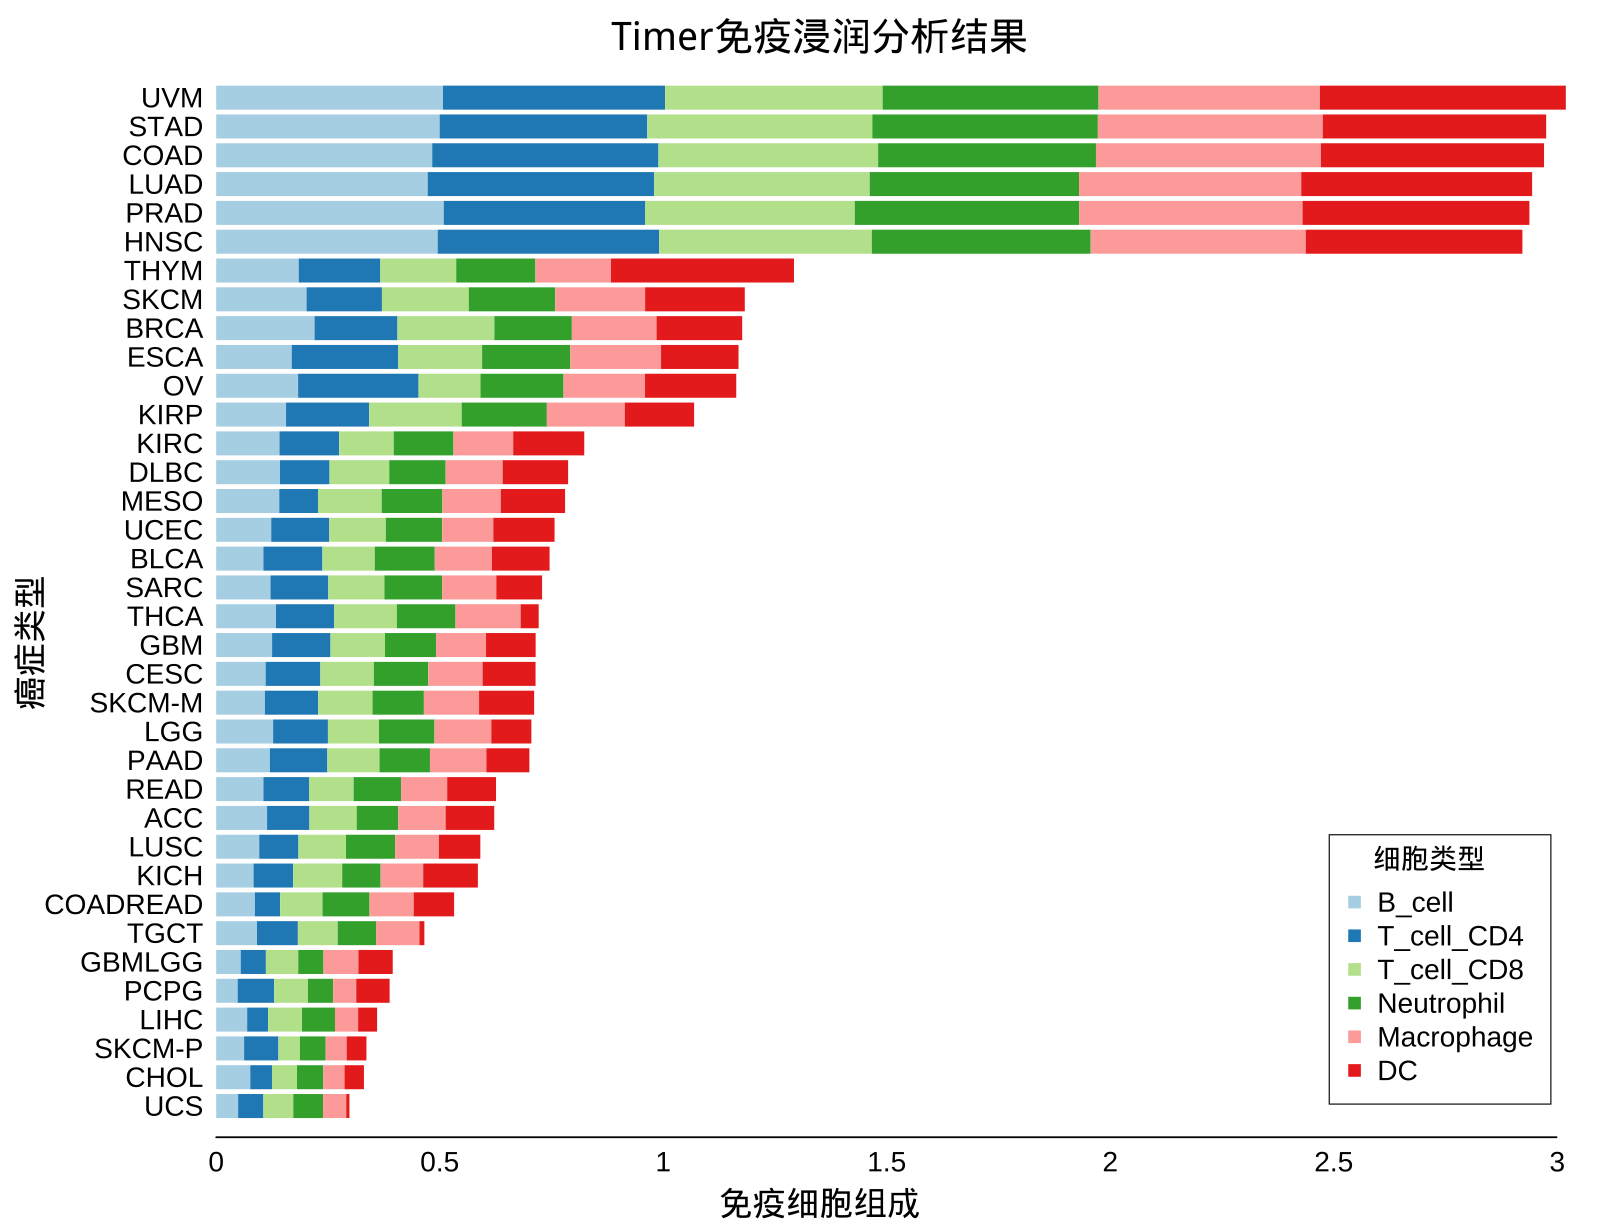

In [223]:
s1 <- seq(-1,1,l=ncol(u)+1)
s2 <- seq(-1,1,l=nrow(u)+1)
xc <- (s1[-1] + s1[-length(s1)])/2
yc <- (s2[-1] + s2[-length(s2)])/2
xl <- xc - (s1[2] - s1[1])/2 * 0.9
xr <- xc + (s1[2] - s1[1])/2 * 0.9
yb <- yc - (s2[2] - s2[1])/2 * 0.7
yt <- yc + (s2[2] - s2[1])/2 * 0.7
cols <- rep(grey(0.7,0.5), length(u))
# 比例>=0.01的标记为红色
cols[which(as.numeric(t(round(u,3))) >= 0.1)] <- '#fb9a99'

pdf(paste0(fig_path, 'Timer免疫浸润比例估计.PDF'), 
    width = 5, height = 8)
plot.new()
plot.window(xlim = c(-1,1), ylim = c(-1,1))
for (i in s1)  lines(rep(i,2), c(-1,1), col=grey(0.5,0.3))
for (i in s2)  lines(c(-1,1), rep(i,2), col=grey(0.5,0.3))
rect(rep(xl, nrow(u)), rep(rev(yb), each=ncol(u)), 
     rep(xr, nrow(u)), rep(rev(yt), each=ncol(u)), border=NA, col=cols)
mtext(rownames(u), side=2, line=-0.6, at=yc, las=1, cex=0.7)
mtext(colnames(u), side=1, line=-0.96, at=xc, las=2, cex=0.8)
mtext('癌症类型', side=2, line=2.2, cex=0.8)
mtext('细胞类型', side=1, line=2.6, cex=0.8)
mtext('Timer免疫浸润比例估计', side=3, line=-0.8, cex=0.9)
text(rep(xc, nrow(u)), rep(rev(yc), each=ncol(u)), 
     as.numeric(t(round(u,3))), cex=0.6)
dev.off()

png 
  2

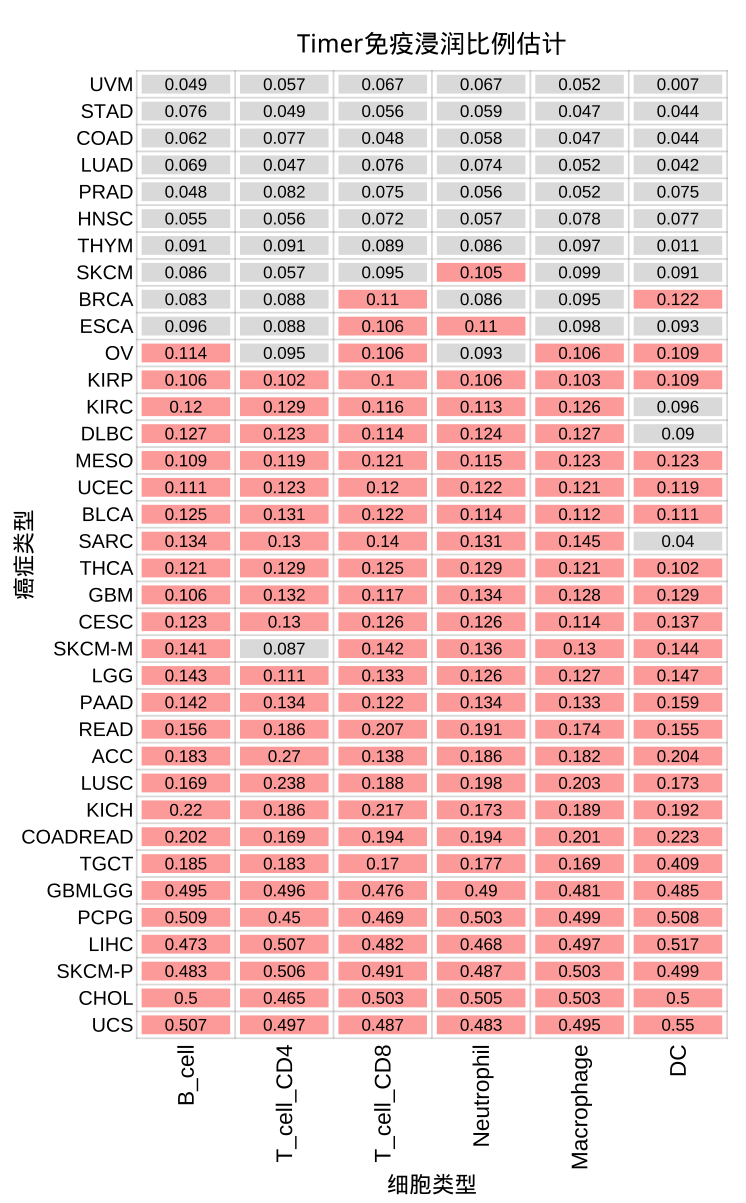

#### CIBERSORT

In [249]:
d <- as.data.frame(readxl::read_excel(paste0(data_path, 'df.xlsx'), 
                                      sheet='CIBER_o'))
d$type <- substring(unlist(strsplit(d[,1], 
        '(', fixed = TRUE))[seq(1, 2*nrow(d), by=2)], 6, last = 1000000L)
d$score <- rowSums(d[,3:24])
dim(d)
head(d,2)

[1] 12482    27

CODE            ID              B_cells_naive B_cells_memory Plasma_cells
1 TCGA-GBM(N=152) TCGA-19-1787-01 0             0.02535646     0.000000000 
2 TCGA-GBM(N=152) TCGA-06-5412-01 0             0.04103615     0.001945716 
  T_cells_CD8 T_cells_CD4_naive T_cells_CD4_memory_resting
1 0.05844189  0                 0.007431473               
2 0.01158080  0                 0.030896974               
  T_cells_CD4_memory_activated T_cells_follicular_helper ⋯ Macrophages_M2
1 0                            0.02054828                ⋯ 0.7188046     
2 0                            0.01838572                ⋯ 0.5780512     
  Dendritic_cells_resting Dendritic_cells_activated Mast_cells_resting
1 0                       0.0012921449              0.1017162         
2 0                       0.0005303586              0.0000000         
  Mast_cells_activated Eosinophils Neutrophils exp    type score
1 0.00000000           0.000000000 0.01378871  5.5336 GBM  1    
2 0.07668431           0.004519797 0.03341158  5.2122 GBM  1

In [250]:
u <- func(d, 3, 24)
CIBERSORT <- f(d,25,27)
cols <- c('#9ecae1','#6baed6','#4292c6','#2171b5','#084594',
          '#ccece6','#99d8c9','#66c2a4','#2ca25f','#006d2c',
          '#ffffd4','#fee391','#fec44f','#fe9929','#d95f0e','#993404',
          '#fee5d9','#fcbba1','#fc9272','#fb6a4a','#de2d26','#a50f15')

pdf(paste0(fig_path, 'CIBERSORT免疫浸润分析结果.PDF'), 
    width = 12, height = 8)
barplot(t(u), horiz=TRUE, col=cols, las=1, border=NA, yaxt='n',
        axes=FALSE, ylim=c(0,43), xlim=c(-0.6,2.12))
lines(c(0,2.8), rep(-0.6,2))
mtext(seq(0,1.5,by=.3), side=1, line=-0.5, at=seq(0,1.5,by=.3))
mtext(rownames(u), side=2, line=-11.5, at=1:39*1.2-0.5, las=1)
mtext('免疫细胞组成', side=1, line=0.8, cex=1.2)
mtext('癌症类型', side=2, line=-6.8, cex=1.2)
mtext('CIBERSORT免疫浸润分析结果', side=3, line=2, cex=1.4)
legend(1.5, 27, colnames(u), pch=15, col=cols, cex=0.8,
       box.col=grey(0.2,0.8), box.lwd=0.8, text.width=0.53, 
       x.intersp=0.7, y.intersp=0.9, 
       title='细胞类型', title.adj=0.11, title.cex=0.9)
dev.off()

png 
  2

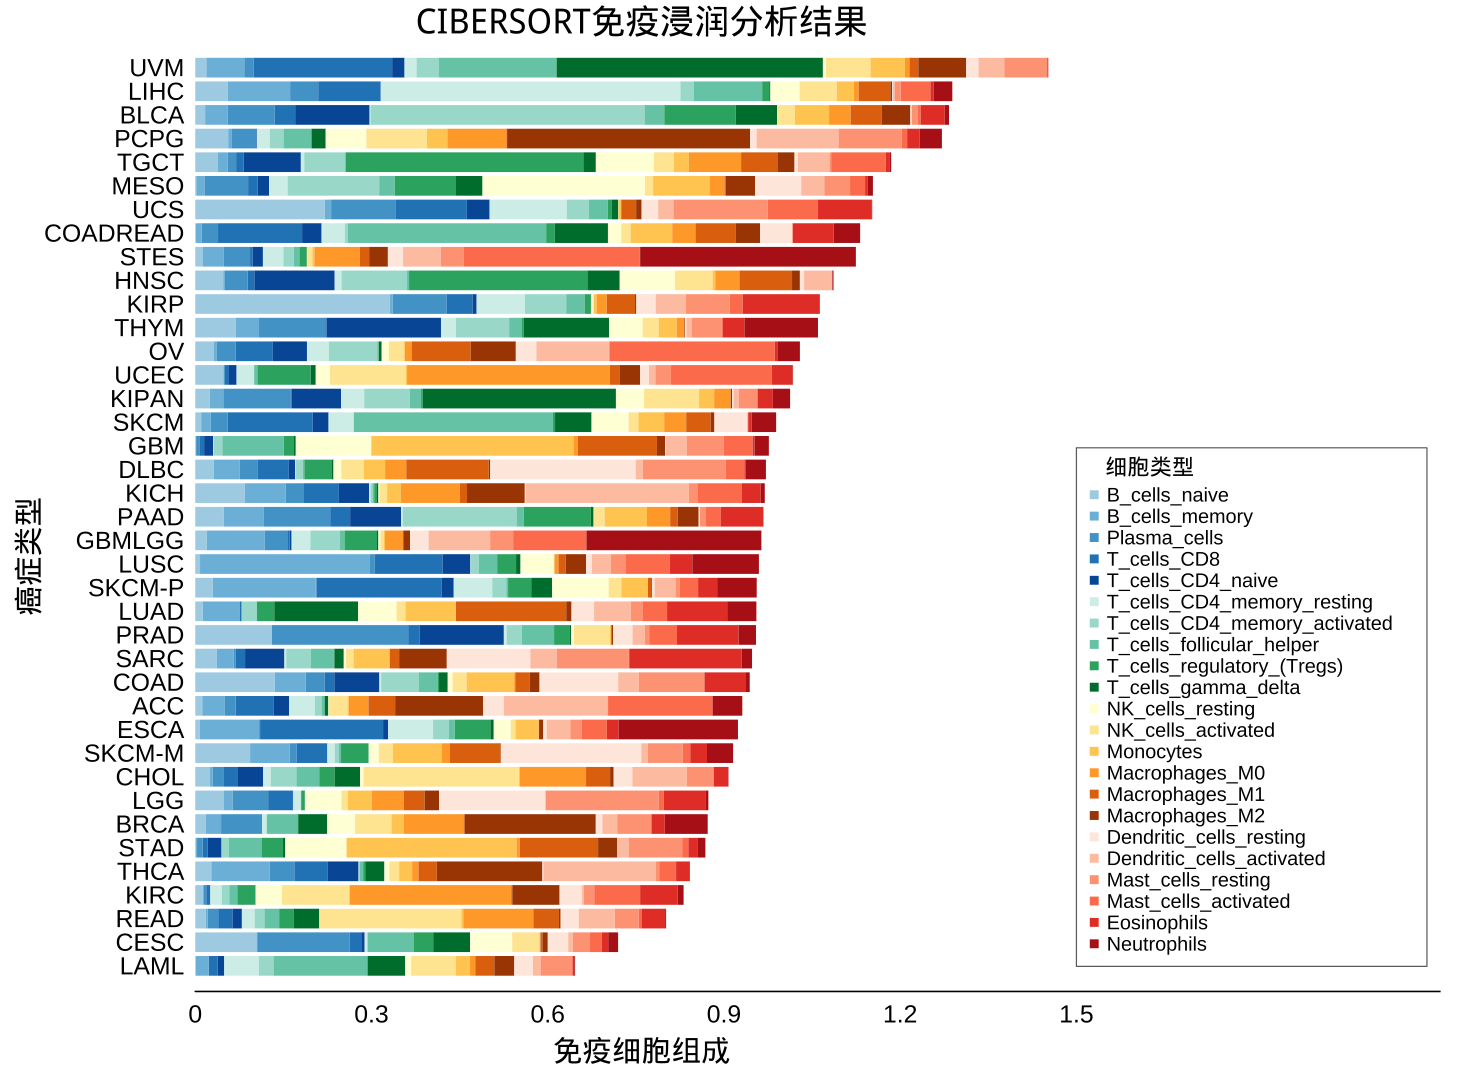

In [226]:
s1 <- seq(-1,1,l=ncol(u)+1)
s2 <- seq(-1,1,l=nrow(u)+1)
xc <- (s1[-1] + s1[-length(s1)])/2
yc <- (s2[-1] + s2[-length(s2)])/2
xl <- xc - (s1[2] - s1[1])/2 * 0.9
xr <- xc + (s1[2] - s1[1])/2 * 0.9
yb <- yc - (s2[2] - s2[1])/2 * 0.7
yt <- yc + (s2[2] - s2[1])/2 * 0.7
cols <- rep(grey(0.7,0.5), length(u))
# 比例>=0.01的标记为红色
cols[which(as.numeric(t(round(u,3))) >= 0.1)] <- '#fb9a99'

pdf(paste0(fig_path, 'CIBERSORT免疫浸润比例估计.PDF'), 
    width = 8, height = 8)
plot.new()
plot.window(xlim = c(-1,1), ylim = c(-1,1))
for (i in s1)  lines(rep(i,2), c(-1,1), col=grey(0.5,0.3))
for (i in s2)  lines(c(-1,1), rep(i,2), col=grey(0.5,0.3))
rect(rep(xl, nrow(u)), rep(rev(yb), each=ncol(u)), 
     rep(xr, nrow(u)), rep(rev(yt), each=ncol(u)), border=NA, col=cols)
mtext(rownames(u), side=2, line=-1, at=yc, las=1, cex=0.7)
mtext(colnames(u), side=1, line=-0.96, at=xc, las=2, cex=0.5)
mtext('癌症类型', side=2, line=2.2, cex=0.8)
mtext('细胞类型', side=1, line=4.2, cex=0.8)
mtext('CIBERSORT免疫浸润比例估计', side=3, line=-0.8, cex=0.9)
text(rep(xc, nrow(u)), rep(rev(yc), each=ncol(u)), 
     as.numeric(t(round(u,3))), cex=0.5)
dev.off()

png 
  2

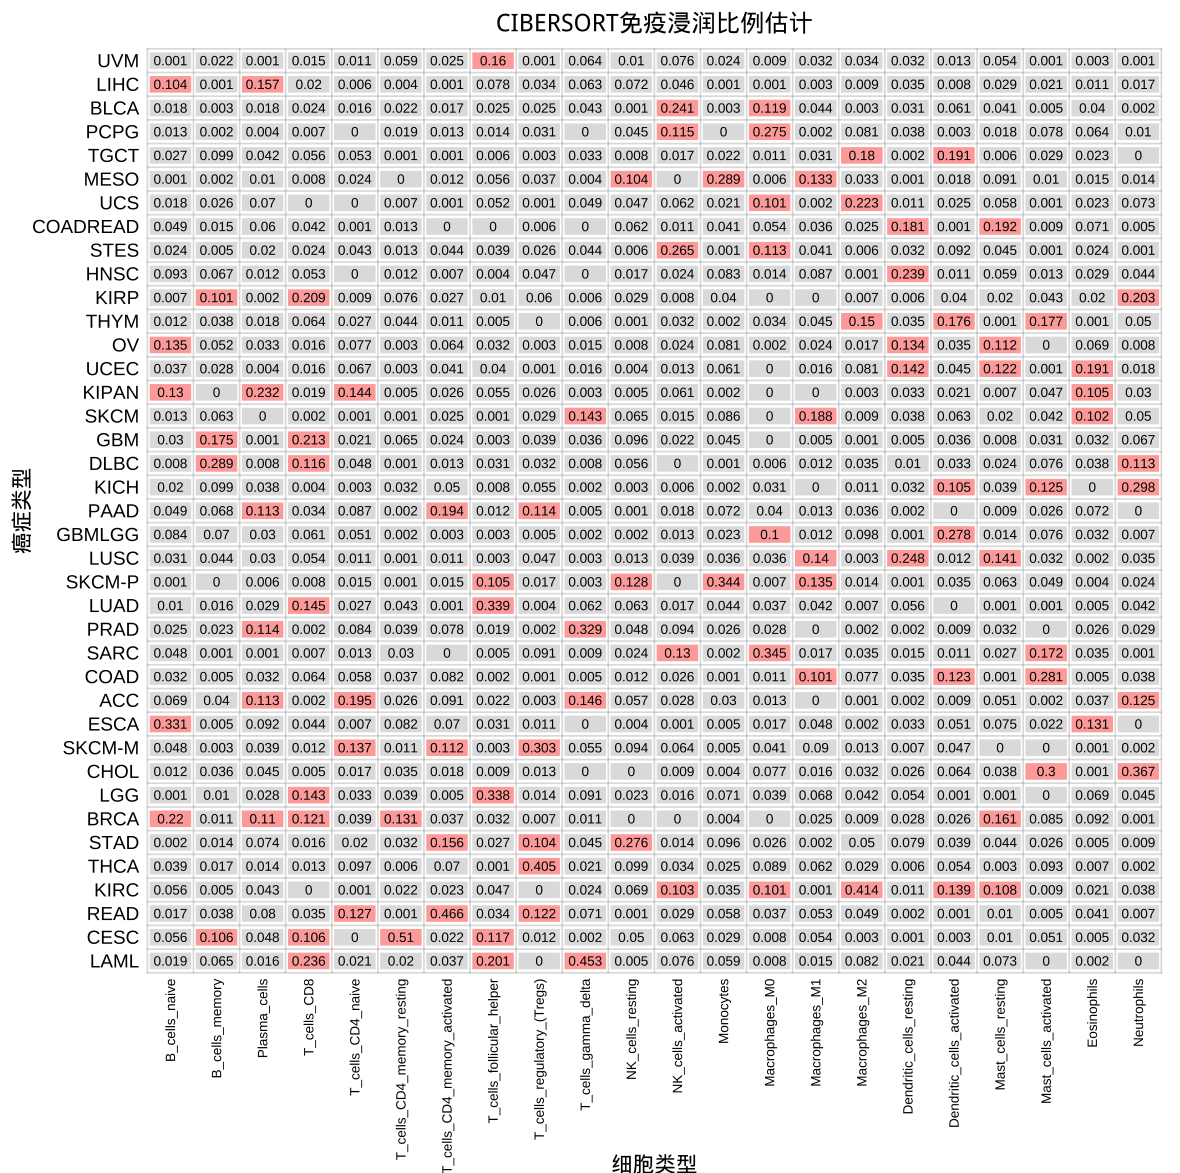

#### QUANTISEQ

In [251]:
d <- as.data.frame(readxl::read_excel(paste0(data_path, 'df.xlsx'), 
                                      sheet='QUAN_o'))
d$type <- substring(unlist(strsplit(d[,1], 
        '(', fixed = TRUE))[seq(1, 2*nrow(d), by=2)], 6, last = 1000000L)
d$score <- rowSums(d[,3:13])
dim(d)
head(d,2)

[1] 12482    16

CODE            ID              B_cells     Macrophages_M1 Macrophages_M2
1 TCGA-GBM(N=152) TCGA-19-1787-01 0.010238020 0.00788682     0.06050673    
2 TCGA-GBM(N=152) TCGA-06-5412-01 0.003474293 0.04120520     0.11494330    
  Monocytes Neutrophils NK_cells   T_cells_CD4 T_cells_CD8 Tregs
1 0.101467  0           0.02367644 0           0           0    
2 0.000000  0           0.03086159 0           0           0    
  Dendritic_cells Other     exp    type score
1 0.0000000       0.7962250 5.5336 GBM  1    
2 0.1652921       0.6442235 5.2122 GBM  1

In [252]:
u <- func(d, 3, 13)
QUANTISEQ <- f(d,14,16)
cols <- c('#a6cee3','#1f78b4','#b2df8a','#33a02c','#fb9a99','#e31a1c',
          '#fdbf6f','#ffff99','#ff7f00','#cab2d6','#6a3d9a')
pdf(paste0(fig_path, 'QUANTISEQ免疫浸润分析结果.PDF'), 
    width = 12, height = 8)
barplot(t(u), horiz=TRUE, col=cols, las=1, border=NA, yaxt='n',
        axes=FALSE, ylim=c(0,43), xlim=c(-0.6,1.75))
lines(c(0,2.8), rep(-0.6,2))
mtext(seq(0,1.5,by=.3), side=1, line=-0.5, at=seq(0,1.5,by=.3))
mtext(rownames(u), side=2, line=-13.5, at=1:39*1.2-0.5, las=1)
mtext('免疫细胞组成', side=1, line=0.8, cex=1.2, at=0.7)
mtext('癌症类型', side=2, line=-8.8, cex=1.2)
mtext('QUANTISEQ免疫浸润分析结果', side=3, line=2, cex=1.4, at=0.7)
legend(1.4, 15, colnames(u), pch=15, col=cols, cex=0.8,
       box.col=grey(0.2,0.8), box.lwd=0.8, text.width=0.24, 
       x.intersp=0.7, y.intersp=0.9, 
       title='细胞类型', title.adj=0.24, title.cex=0.9)
dev.off()

png 
  2

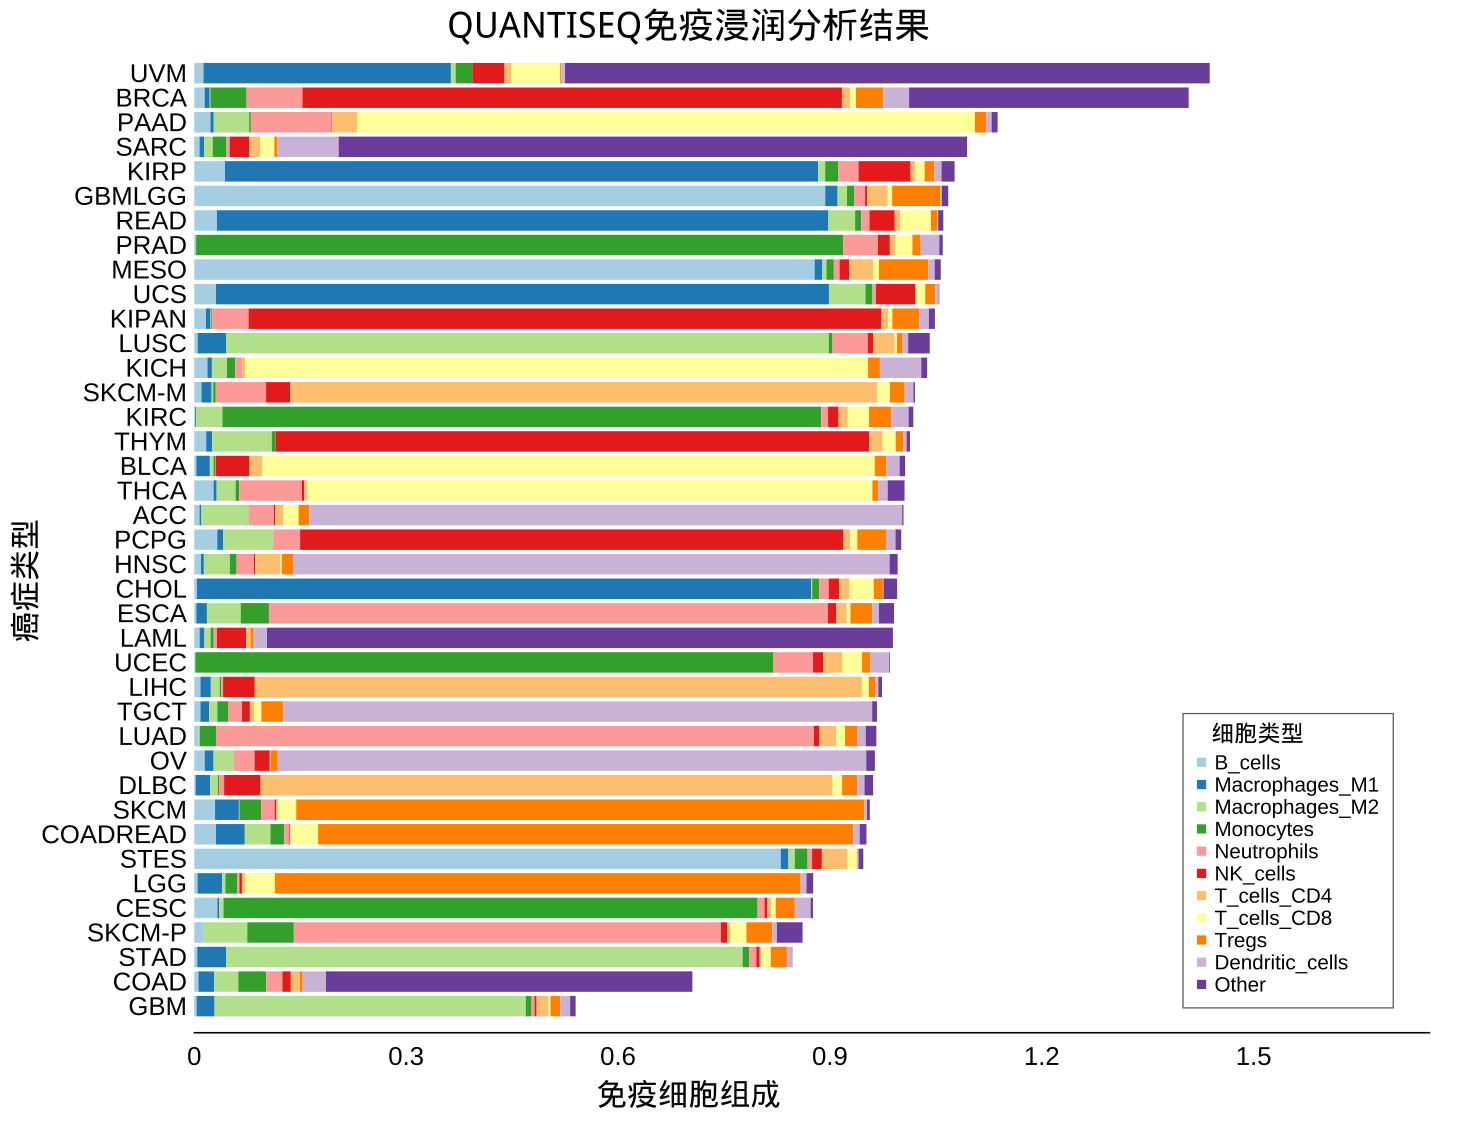

In [229]:
s1 <- seq(-1,1,l=ncol(u)+1)
s2 <- seq(-1,1,l=nrow(u)+1)
xc <- (s1[-1] + s1[-length(s1)])/2
yc <- (s2[-1] + s2[-length(s2)])/2
xl <- xc - (s1[2] - s1[1])/2 * 0.9
xr <- xc + (s1[2] - s1[1])/2 * 0.9
yb <- yc - (s2[2] - s2[1])/2 * 0.7
yt <- yc + (s2[2] - s2[1])/2 * 0.7
cols <- rep(grey(0.7,0.5), length(u))
# 比例>=0.01的标记为红色
cols[which(as.numeric(t(round(u,3))) >= 0.1)] <- '#fb9a99'

pdf(paste0(fig_path, 'QUANTISEQ免疫浸润比例估计.PDF'), 
    width = 10, height = 10)
plot.new()
plot.window(xlim = c(-1,1), ylim = c(-1,1))
for (i in s1)  lines(rep(i,2), c(-1,1), col=grey(0.5,0.3))
for (i in s2)  lines(c(-1,1), rep(i,2), col=grey(0.5,0.3))
rect(rep(xl, nrow(u)), rep(rev(yb), each=ncol(u)), 
     rep(xr, nrow(u)), rep(rev(yt), each=ncol(u)), border=NA, col=cols)
mtext(rownames(u), side=2, line=-1.4, at=yc, las=1, cex=0.7)
mtext(colnames(u), side=1, line=-1.4, at=xc, las=2, cex=0.8)
mtext('癌症类型', side=2, line=1.8, cex=0.8)
mtext('细胞类型', side=1, line=3.8, cex=0.8)
mtext('QUANTISEQ免疫浸润比例估计', side=3, line=-1.2, cex=0.9)
text(rep(xc, nrow(u)), rep(rev(yc), each=ncol(u)), 
     as.numeric(t(round(u,3))), cex=0.7)
dev.off()

png 
  2

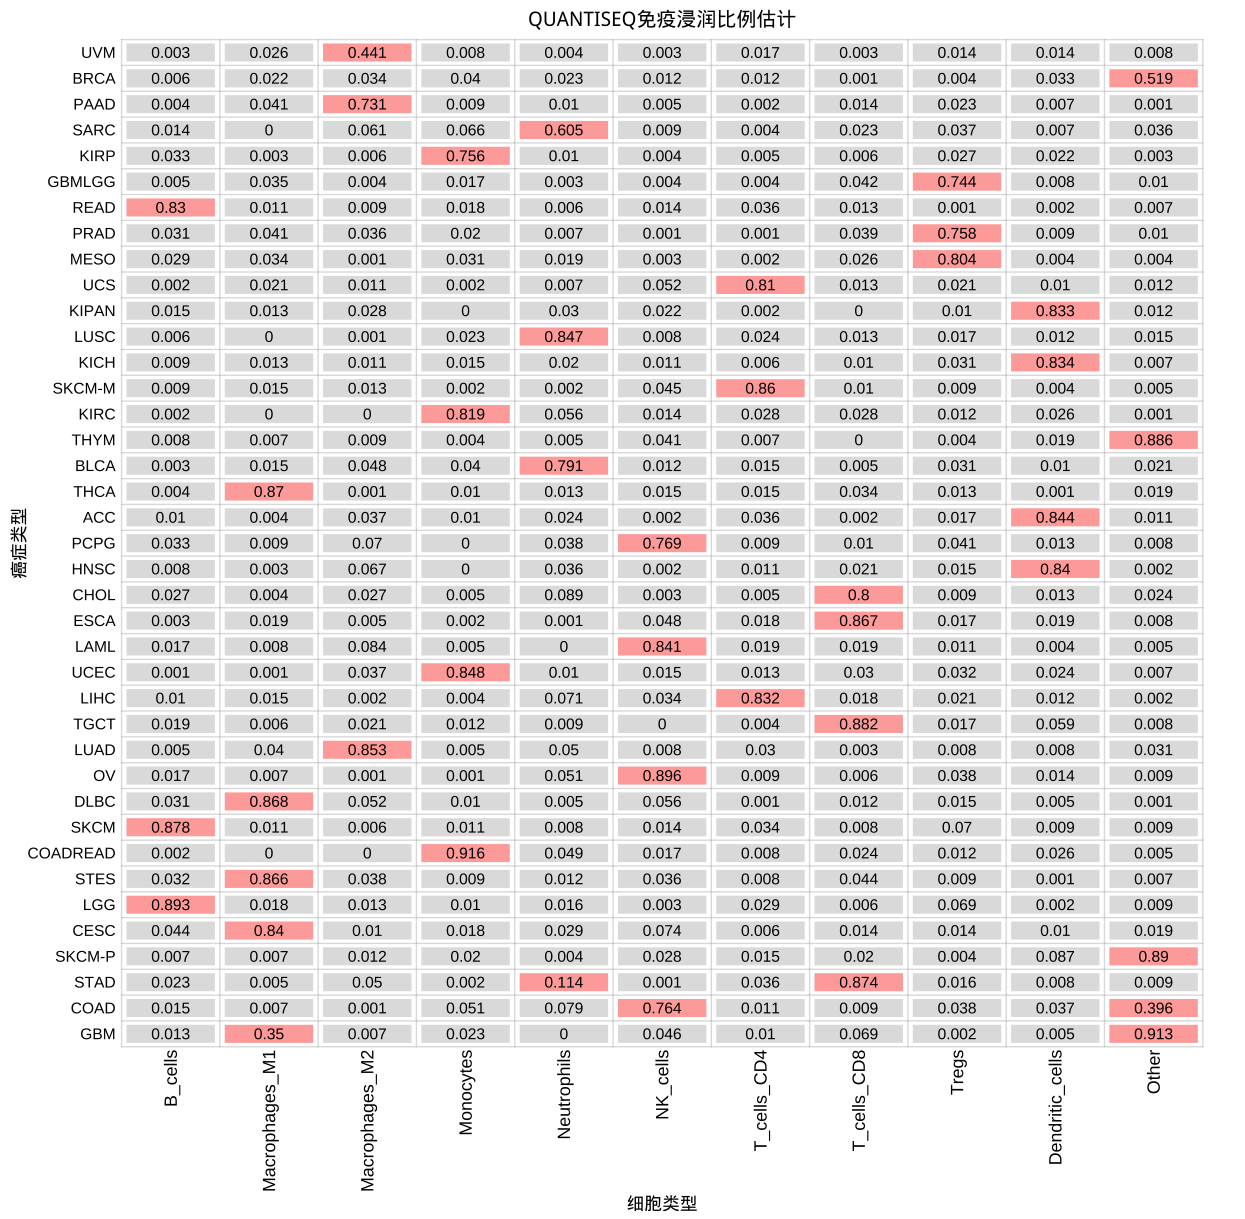

#### EPIC

In [253]:
d <- as.data.frame(readxl::read_excel(paste0(data_path, 'df.xlsx'), 
                                      sheet='EPIC_o'))
d$type <- substring(unlist(strsplit(d[,1], 
        '(', fixed = TRUE))[seq(1, 2*nrow(d), by=2)], 6, last = 1000000L)
d$score <- rowSums(d[,3:10])
dim(d)
head(d,2)

[1] 12483    13

CODE            ID              Bcells       CAFs        CD4_Tcells
1 TCGA-GBM(N=152) TCGA-19-1787-01 6.433902e-04 0.006448235 0.03821998
2 TCGA-GBM(N=152) TCGA-06-5412-01 3.345499e-07 0.011313460 0.01266926
  CD8_Tcells Endothelial Macrophages NKcells      otherCells exp    type score
1 0.01310513 0.05874563  0.03808742  2.330994e-08 0.8447502  5.5336 GBM  1    
2 0.04303869 0.11791740  0.06610309  1.397288e-03 0.7475605  5.2122 GBM  1

In [254]:
u <- func(d, 3, 10)
EPIC <- f(d,11,13)
cols <- c('#a6cee3','#1f78b4','#b2df8a','#33a02c','#fb9a99','#e78ac3',
          '#fdbf6f','#ff7f00')
pdf(paste0(fig_path, 'EPIC免疫浸润分析结果.PDF'), 
    width = 12, height = 8)
barplot(t(u), horiz=TRUE, col=cols, las=1, border=NA, yaxt='n',
        axes=FALSE, ylim=c(0,43), xlim=c(-0.6,1.73))
lines(c(0,2.8), rep(-0.6,2))
mtext(seq(0,1.5,by=.3), side=1, line=-0.5, at=seq(0,1.5,by=.3))
mtext(rownames(u), side=2, line=-13.5, at=1:39*1.2-0.5, las=1)
mtext('免疫细胞组成', side=1, line=0.8, cex=1.2, at=0.8)
mtext('癌症类型', side=2, line=-8.2, cex=1.2)
mtext('EPIC免疫浸润分析结果', side=3, line=2, cex=1.4, at=0.8)
legend(1.46, 12, colnames(u), pch=15, col=cols, cex=0.8,
       box.col=grey(0.2,0.8), box.lwd=0.8, text.width=0.19, 
       x.intersp=0.7, y.intersp=0.9, 
       title='细胞类型', title.adj=0.36, title.cex=0.9)
dev.off()

png 
  2

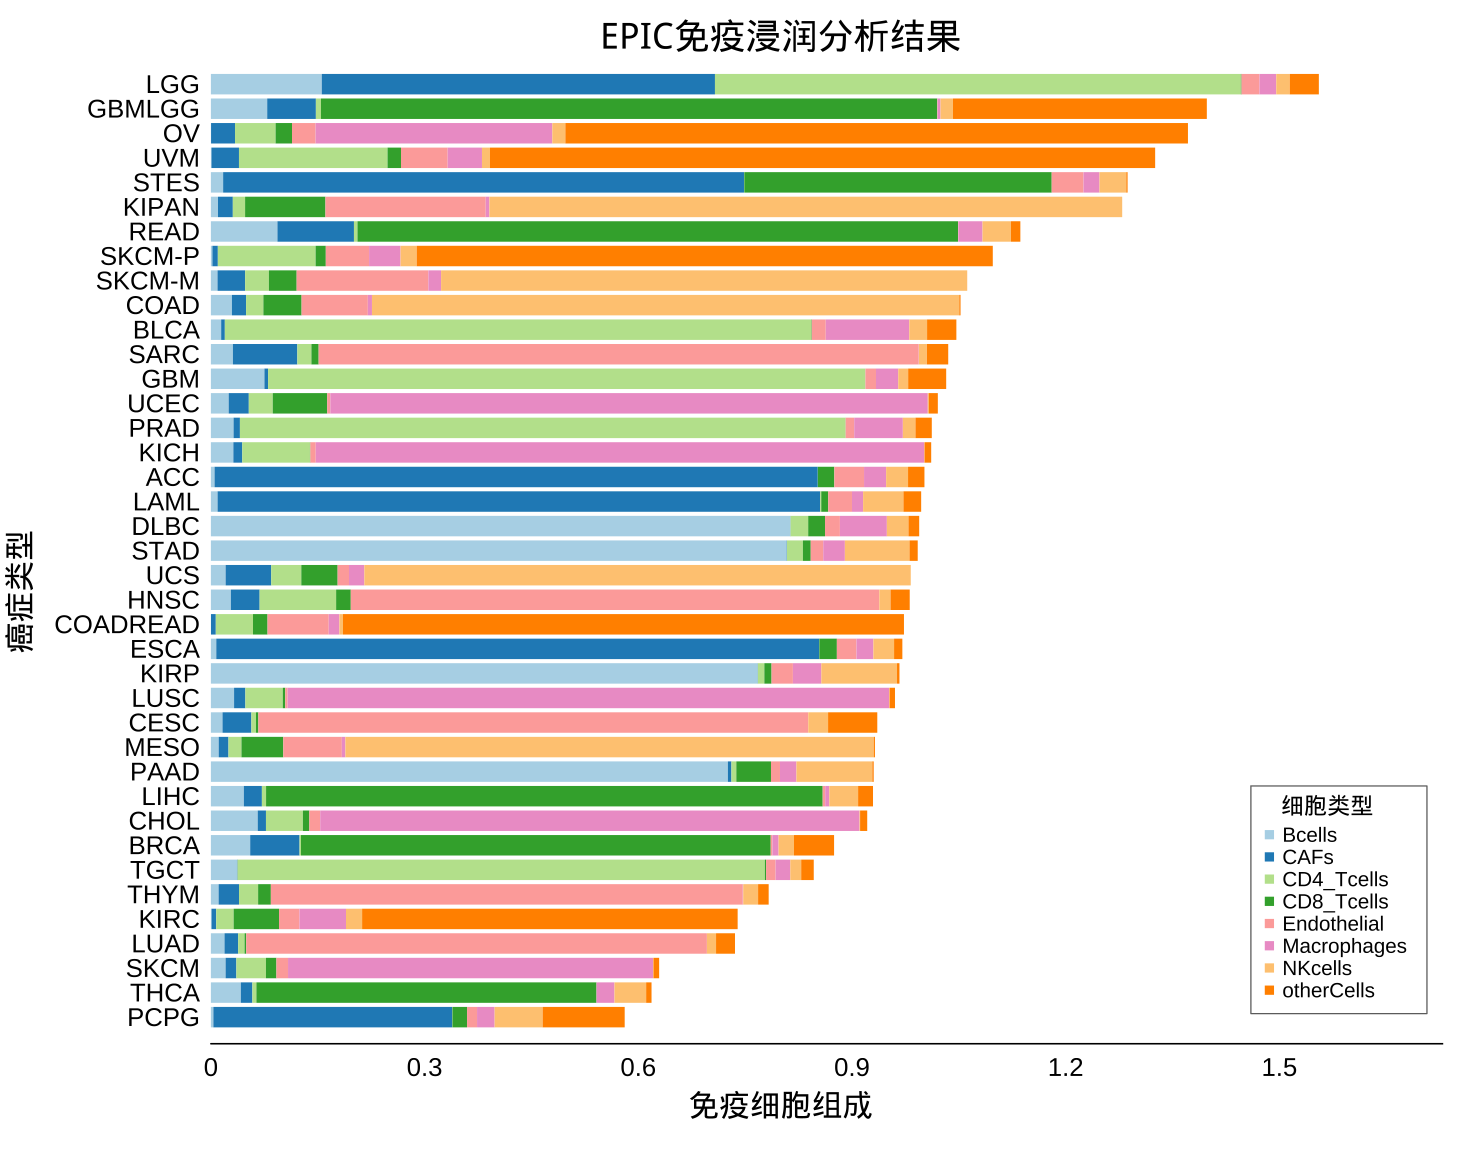

In [232]:
s1 <- seq(-1,1,l=ncol(u)+1)
s2 <- seq(-1,1,l=nrow(u)+1)
xc <- (s1[-1] + s1[-length(s1)])/2
yc <- (s2[-1] + s2[-length(s2)])/2
xl <- xc - (s1[2] - s1[1])/2 * 0.9
xr <- xc + (s1[2] - s1[1])/2 * 0.9
yb <- yc - (s2[2] - s2[1])/2 * 0.7
yt <- yc + (s2[2] - s2[1])/2 * 0.7
cols <- rep(grey(0.7,0.5), length(u))
# 比例>=0.01的标记为红色
cols[which(as.numeric(t(round(u,3))) >= 0.1)] <- '#fb9a99'

pdf(paste0(fig_path, 'EPIC免疫浸润比例估计.PDF'), 
    width = 7, height = 10)
plot.new()
plot.window(xlim = c(-1,1), ylim = c(-1,1))
for (i in s1)  lines(rep(i,2), c(-1,1), col=grey(0.5,0.3))
for (i in s2)  lines(c(-1,1), rep(i,2), col=grey(0.5,0.3))
rect(rep(xl, nrow(u)), rep(rev(yb), each=ncol(u)), 
     rep(xr, nrow(u)), rep(rev(yt), each=ncol(u)), border=NA, col=cols)
mtext(rownames(u), side=2, line=-0.9, at=yc, las=1, cex=0.7)
mtext(colnames(u), side=1, line=-1.4, at=xc, las=2, cex=0.8)
mtext('癌症类型', side=2, line=2.4, cex=0.8)
mtext('细胞类型', side=1, line=2.6, cex=0.8)
mtext('EPIC免疫浸润比例估计', side=3, line=-1.2, cex=0.9)
text(rep(xc, nrow(u)), rep(rev(yc), each=ncol(u)), 
     as.numeric(t(round(u,3))), cex=0.7)
dev.off()

png 
  2

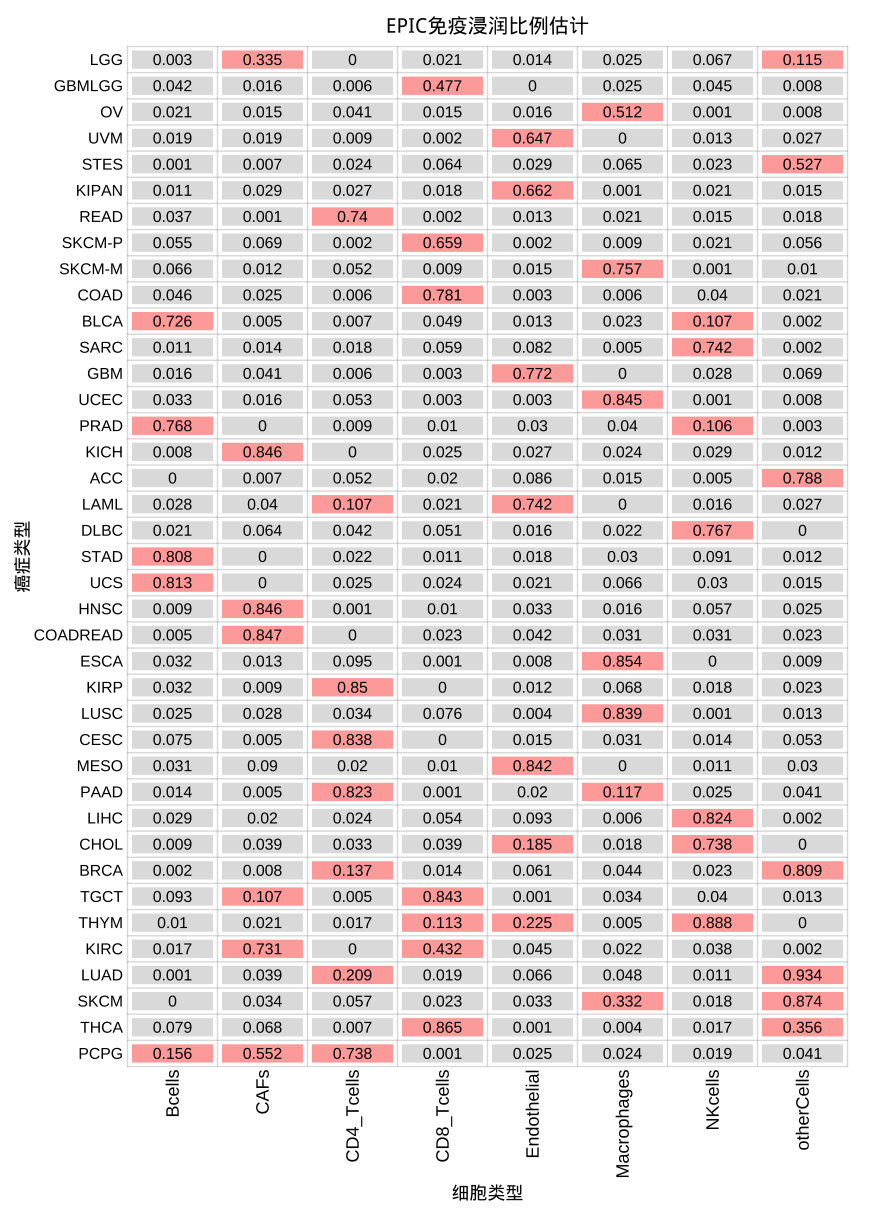

#### MCPcounter

In [255]:
d <- as.data.frame(readxl::read_excel(paste0(data_path, 'df.xlsx'), 
                                      sheet='MCP_o'))
d$type <- substring(unlist(strsplit(d[,1], 
        '(', fixed = TRUE))[seq(1, 2*nrow(d), by=2)], 6, last = 1000000L)
d$score <- rowSums(d[,3:12])
dim(d)
head(d,2)

[1] 12483    15

CODE            ID              T_cells CD8_T_cells Cytotoxic_lymphocytes
1 TCGA-GBM(N=152) TCGA-19-1787-01 3.52332 0.67        1.441414             
2 TCGA-GBM(N=152) TCGA-06-5412-01 1.70534 0.47        5.208486             
  B_lineage NK_cells Monocytic_lineage Myeloid_dendritic_cells Neutrophils
1 3.807678  0.08875  21.20881          1.046633                5.047960   
2 6.839956  0.14375  39.81539          2.123283                5.071947   
  Endothelial_cells Fibroblasts exp    type score   
1 11.29250           57.87848   5.5336 GBM  106.0055
2 19.04113          331.17040   5.2122 GBM  411.5897

In [256]:
u <- func(d, 3, 12)
MCPcounter <- f(d,13,15)
cols <- c('#a6cee3','#1f78b4','#b2df8a','#33a02c','#fb9a99','#e31a1c','#fdbf6f',
          '#ff7f00','#cab2d6','#6a3d9a')
pdf(paste0(fig_path, 'MCPcounter免疫浸润分析结果.PDF'), 
    width = 12, height = 8)
barplot(t(u), horiz=TRUE, col=cols, las=1, border=NA, yaxt='n',
        axes=FALSE, ylim=c(0,43), xlim=c(-100,2300))
lines(c(0,2300), rep(-0.6,2))
mtext(seq(0,2300,by=200), side=1, line=-0.5, at=seq(0,2300,by=200))
mtext(rownames(u), side=2, line=-2, at=1:39*1.2-0.5, las=1)
mtext('免疫细胞组成', side=1, line=0.8, cex=1.2)
mtext('癌症类型', side=2, line=2.6, cex=1.2)
mtext('MCPcounter免疫浸润分析结果', side=3, line=2, cex=1.4)
legend(1900, 14, colnames(u), pch=15, col=cols, cex=0.8,
       box.col=grey(0.2,0.8), box.lwd=0.8, text.width=320, 
       x.intersp=0.7, y.intersp=0.9, 
       title='细胞类型', title.adj=0.18, title.cex=0.9)
dev.off()

png 
  2

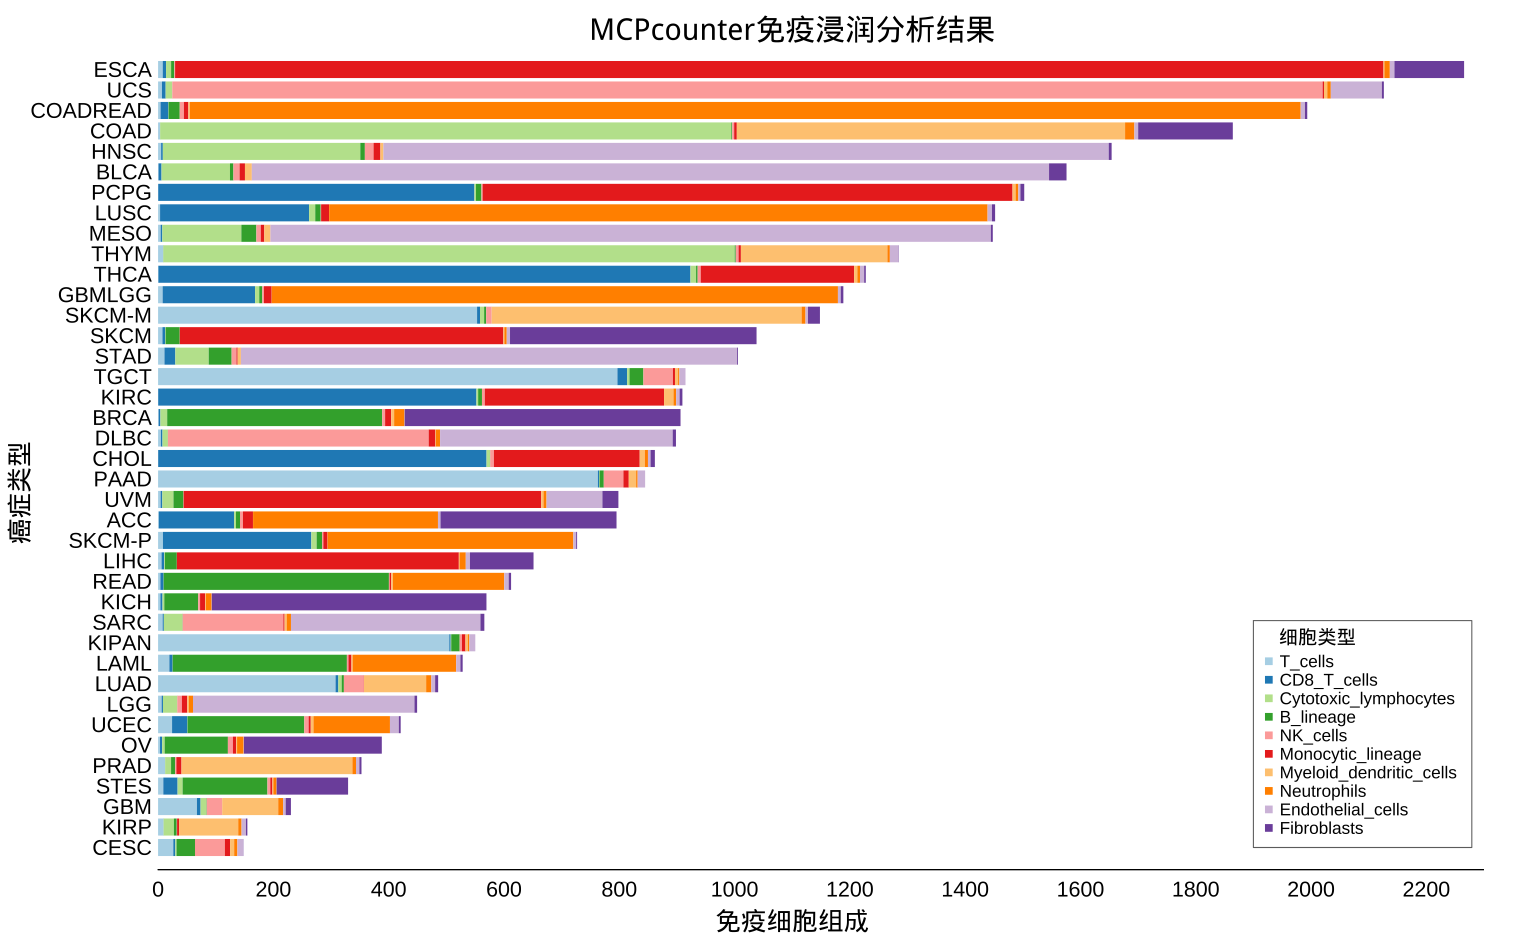

In [235]:
s1 <- seq(-1,1,l=ncol(u)+1)
s2 <- seq(-1,1,l=nrow(u)+1)
xc <- (s1[-1] + s1[-length(s1)])/2
yc <- (s2[-1] + s2[-length(s2)])/2
xl <- xc - (s1[2] - s1[1])/2 * 0.9
xr <- xc + (s1[2] - s1[1])/2 * 0.9
yb <- yc - (s2[2] - s2[1])/2 * 0.7
yt <- yc + (s2[2] - s2[1])/2 * 0.7
cols <- rep(grey(0.7,0.5), length(u))
# 比例>=10的标记为红色
cols[which(as.numeric(t(round(u))) >= 10)] <- '#fb9a99'

pdf(paste0(fig_path, 'MCPcounter免疫浸润比例估计.PDF'), 
    width = 6, height = 10)
plot.new()
plot.window(xlim = c(-1,1), ylim = c(-1,1))
for (i in s1)  lines(rep(i,2), c(-1,1), col=grey(0.5,0.3))
for (i in s2)  lines(c(-1,1), rep(i,2), col=grey(0.5,0.3))
rect(rep(xl, nrow(u)), rep(rev(yb), each=ncol(u)), 
     rep(xr, nrow(u)), rep(rev(yt), each=ncol(u)), border=NA, col=cols)
mtext(rownames(u), side=2, line=-0.7, at=yc, las=1, cex=0.7)
mtext(colnames(u), side=1, line=-1.4, at=xc, las=2, cex=0.66)
mtext('癌症类型', side=2, line=2.2, cex=0.8)
mtext('细胞类型', side=1, line=4, cex=0.8)
mtext('MCPcounter免疫浸润比例估计', side=3, line=-1.2, cex=0.9)
text(rep(xc, nrow(u)), rep(rev(yc), each=ncol(u)), 
     as.numeric(t(round(u))), cex=0.6)
dev.off()

png 
  2

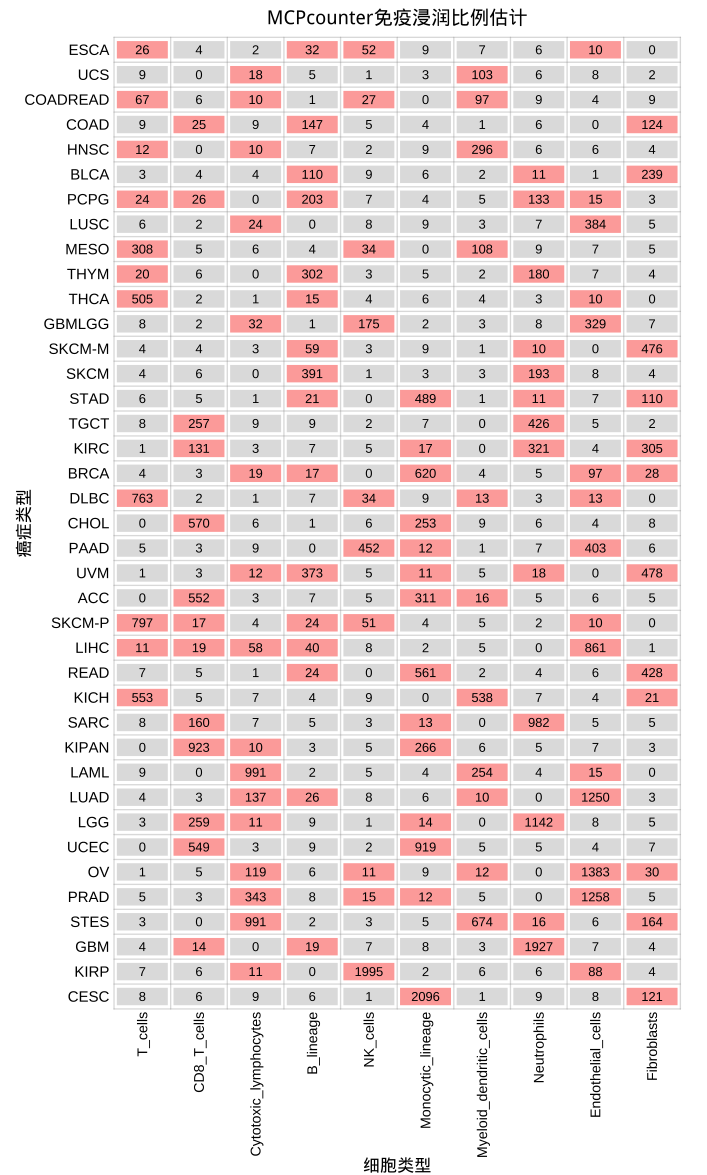

#### 免疫浸润评分与基因表达量的相关性和显著性

In [257]:
m <- matrix(NA, nc=2, nr=3)
rownames(m) <- 
rownames(CIBERSORT)[which(!(rownames(CIBERSORT) %in% rownames(Timer)))]
colnames(m) <- c('p','r')
Timer <- rbind(Timer, m)
Timer <- Timer[order(rownames(Timer)),]
a <- cbind(Timer, CIBERSORT, QUANTISEQ, EPIC, MCPcounter)
colnames(a) <- paste(colnames(a), rep(c('Timer', 'CIBERSORT', 
               'QUANTISEQ', 'EPIC', 'MCPcounter'), each=2), sep='_')
a <- a[,c(1:5*2, 1:5*2-1)]
head(a,2)

r_Timer   r_CIBERSORT r_QUANTISEQ r_EPIC       r_MCPcounter p_Timer     
ACC  0.6398715 -0.08333748 -0.05673039 -0.174739604 0.55306700   3.729051e-10
BLCA 0.3759859  0.06793138  0.03458020 -0.004125004 0.09202836   4.785740e-15
     p_CIBERSORT p_QUANTISEQ p_EPIC    p_MCPcounter
ACC  0.4711697   0.6240916   0.1285174 1.827749e-07
BLCA 0.1724279   0.4877011   0.9340441 6.427914e-02

In [20]:
write.csv(a, paste0(fig_path, 'cor_p.csv'))

热力图：https://www.datanovia.com/en/lessons/heatmap-in-r-static-and-interactive-visualization/

In [258]:
library(circlize)
library(ComplexHeatmap)
col_fun = colorRamp2(c(0, 0.1, 1), c("blue", "white", "red"))
mat <- as.matrix(a[,6:10])

pdf(paste0(fig_path, '免疫浸润评分与基因表达量的相关性和显著性.PDF'),
    width = 8, height = 8)
h1 <- Heatmap(mat, name = "p value",
        col=col_fun, na_col='grey',
        column_labels=unlist(strsplit(colnames(mat), '_', fixed = TRUE))[1:5*2],
        show_row_dend = FALSE,
        show_column_dend = FALSE,
        cluster_rows=FALSE, cluster_columns=FALSE,
        column_names_gp = gpar(fontsize = 15),
        row_names_gp = gpar(fontsize = 9), #行刻度大小     
        cell_fun=function(j,i,x,y,w,h,fill){
        if(is.na(mat[i,j])){  mat[i,j] <- 100
        } else if(mat[i,j] < 0.001){  grid.text('***',x,y)
        } else if(mat[i,j] < 0.01){  grid.text('**',x,y)
        } else if(mat[i,j] < 0.05){  grid.text('*',x,y)
        } else  grid.text('',x,y)}) 

h2 <- Heatmap(as.matrix(a[,1:5]), name = "correlation", 
        na_col = "grey", cluster_rows=FALSE, cluster_columns=FALSE,
        column_labels=unlist(strsplit(colnames(mat), '_', fixed = TRUE))[1:5*2],
        column_names_gp = gpar(fontsize = 14),
        col = circlize::colorRamp2(c(-0.33, 0, 0.73), 
              c("green", "white", "red")))           
h2 + h1
dev.off()

png 
  2

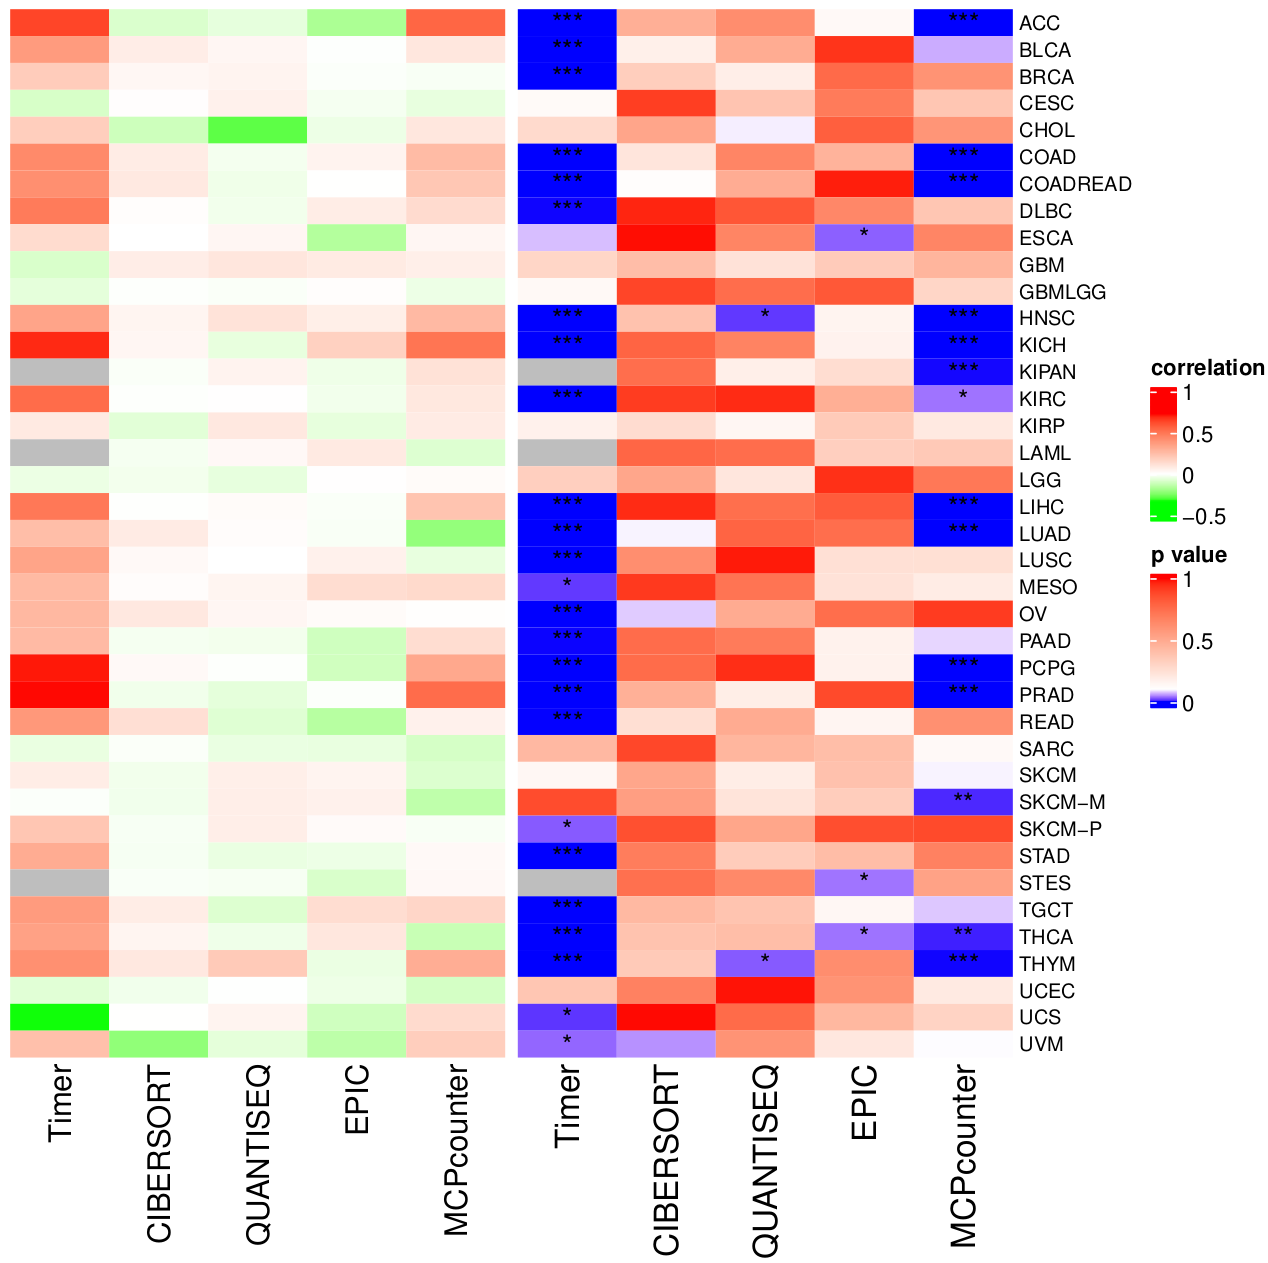